# Import

In [8]:
import pandas as pd
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from matplotlib.image import imread # widthxhxc
import numpy as np
import statsmodels.formula.api as smf
from decimal import Decimal
import math
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
from sklearn.model_selection import cross_val_score

# Data

In [9]:
test = pd.read_csv("test.csv")
train = pd.read_csv("train.csv")

In [10]:
# see columns
list(train.columns.values)[:5]

['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3']

In [11]:
# sqrt(784) so 28x28 pixels
print(test.shape, train.shape)

(28000, 784) (42000, 785)


In [12]:
xTrain = train.iloc[:500, 1:] # get all row for every other column
yTrain = train.iloc[:500, :1] # get every row for label

# Now look at this beauty

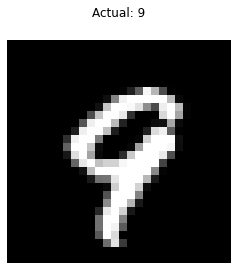

In [13]:
def predictDigit(number):
    i = number
    plt.matshow(np.array(xTrain.iloc[i, :]).reshape((28,28)), cmap="binary_r")

    _ = plt.axis("off")
    plt.title(f"Actual: {yTrain.label[i]}")

    plt.show()
predictDigit(33)

# Predict multiple from train

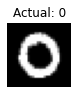

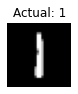

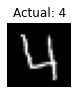

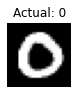

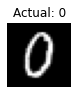

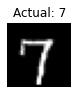

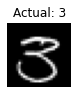

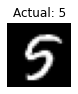

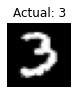

In [14]:
# show the numbers based on train
for i in range(1,10):
    plt.subplot(3,3, i)
    plt.imshow(np.array(xTrain.iloc[i, :]).reshape((28,28)), cmap = 'binary_r')

    _ = plt.axis("off")
    plt.title(f"Actual: {yTrain.label[i]}")
    plt.show()

# Warnings

In [15]:
simplefilter("ignore", category=ConvergenceWarning)

In [16]:
max_iter = 500 # what

# Regression (500)

In [17]:
m = LogisticRegression(C = 1000, multi_class="multinomial")
cv = cross_val_score(m, xTrain, yTrain.label, scoring="accuracy", cv=10)
cv.mean()

0.806

In [96]:
m.fit(xTrain,yTrain.label)

LogisticRegression(C=1000000.0, multi_class='multinomial')

Accuracy of 0.8. It was like 0.91 when I had the full thing tho

In [18]:
# 1.5
C_scores = [] # make a new list

for C_val in np.logspace(-6, 6, 13):
    m = LogisticRegression(C = C_val, multi_class="multinomial")
    cv = cross_val_score(m, xTrain, yTrain.label, scoring="accuracy", cv=10)
    C_scores.append(cv.mean()) # append the mean to the list

Text(0, 0.5, 'accuracy')

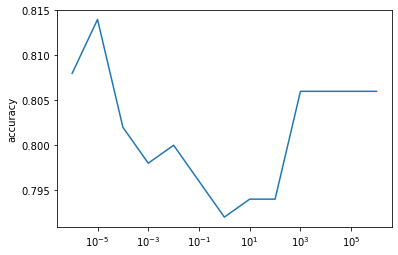

In [19]:
# plot c-score
plt.plot(np.logspace(-6, 6, 13), C_scores)
plt.xscale("log")
plt.ylabel("accuracy")

# 1k

In [27]:
xTrain_1000 = train.iloc[:1000, 1:] # get all row for every other column
yTrain_1000 = train.iloc[:1000, :1] # get every row for label

In [22]:
m1000 = LogisticRegression(C = 1000, multi_class="multinomial")
cv = cross_val_score(m1000, xTrain_1000, yTrain_1000.label, scoring="accuracy", cv=10)
cv.mean()

0.8480000000000001

In [28]:
# 1.5
C_scores = [] # make a new list

for C_val in np.logspace(-6, 6, 13):
    m = LogisticRegression(C = C_val, multi_class="multinomial")
    cv = cross_val_score(m, xTrain_1000, yTrain_1000.label, scoring="accuracy", cv=10)
    C_scores.append(cv.mean()) # append the mean to the list

Text(0, 0.5, 'accuracy')

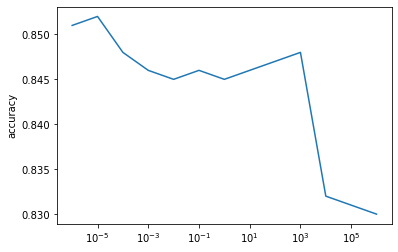

In [29]:
# plot c-score
plt.plot(np.logspace(-6, 6, 13), C_scores)
plt.xscale("log")
plt.ylabel("accuracy")

# 10k

In [31]:
xTrain_10K = train.iloc[:10000, 1:] # get all row for every other column
yTrain_10K = train.iloc[:10000, :1] # get every row for label

In [32]:
m1000 = LogisticRegression(C = 1000, multi_class="multinomial")
cv = cross_val_score(m1000, xTrain_10K, yTrain_10K.label, scoring="accuracy", cv=10)
cv.mean()

0.8763

In [33]:
# 1.5
C_scores = [] # make a new list

for C_val in np.logspace(-6, 6, 13):
    m = LogisticRegression(C = C_val, multi_class="multinomial")
    cv = cross_val_score(m, xTrain_10K, yTrain_10K.label, scoring="accuracy", cv=10)
    C_scores.append(cv.mean()) # append the mean to the list

Text(0, 0.5, 'accuracy')

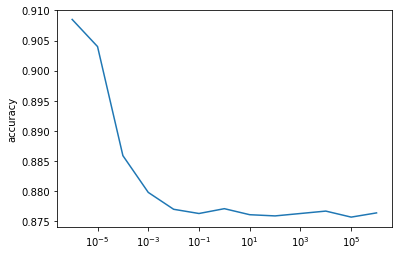

In [34]:
# plot c-score
plt.plot(np.logspace(-6, 6, 13), C_scores)
plt.xscale("log")
plt.ylabel("accuracy")

# 20k

In [35]:
xTrain_20K = train.iloc[:20000, 1:] # get all row for every other column
yTrain_20K = train.iloc[:20000, :1] # get every row for label

In [36]:
m20k = LogisticRegression(C = 1000, multi_class="multinomial")
cv = cross_val_score(m20k, xTrain_20K, yTrain_20K.label, scoring="accuracy", cv=10)
cv.mean()

0.9035

In [37]:
# 1.5
C_scores = [] # make a new list

for C_val in np.logspace(-6, 6, 13):
    m = LogisticRegression(C = C_val, multi_class="multinomial")
    cv = cross_val_score(m, xTrain_20K, yTrain_20K.label, scoring="accuracy", cv=10)
    C_scores.append(cv.mean()) # append the mean to the list

Text(0, 0.5, 'accuracy')

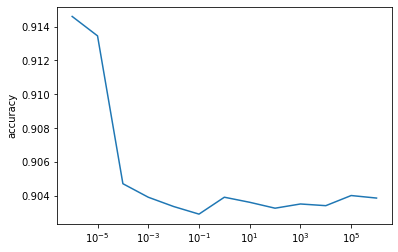

In [38]:
# plot c-score
plt.plot(np.logspace(-6, 6, 13), C_scores)
plt.xscale("log")
plt.ylabel("accuracy")

# Whole kaggle dataset

In [40]:
xTrain_FULL = train.iloc[:, 1:] # get all row for every other column
yTrain_FULL = train.iloc[:, :1] # get every row for label

In [41]:
mFULL = LogisticRegression(C = 1000, multi_class="multinomial")
cv = cross_val_score(mFULL, xTrain_FULL, yTrain_FULL.label, scoring="accuracy", cv=10)
cv.mean()

0.9174761904761904

In [95]:
mFULL.fit(xTrain_FULL,yTrain_FULL.label)

LogisticRegression(C=1000, multi_class='multinomial')

In [42]:
# 1.5
C_scores = [] # make a new list

for C_val in np.logspace(-6, 6, 13):
    m = LogisticRegression(C = C_val, multi_class="multinomial")
    cv = cross_val_score(m, xTrain_FULL, yTrain_FULL.label, scoring="accuracy", cv=10)
    C_scores.append(cv.mean()) # append the mean to the list

Text(0, 0.5, 'accuracy')

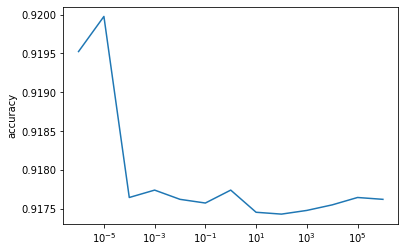

In [43]:
# plot c-score
plt.plot(np.logspace(-6, 6, 13), C_scores)
plt.xscale("log")
plt.ylabel("accuracy")

# testing data

In [87]:
xTest = test.iloc[:5000, :] # get all row for every other column
# yTrain_10K = test.iloc[:10000, :1] # get every row for label

In [50]:
list(test.columns.values)[:10]

['pixel0',
 'pixel1',
 'pixel2',
 'pixel3',
 'pixel4',
 'pixel5',
 'pixel6',
 'pixel7',
 'pixel8',
 'pixel9']

In [100]:
def testPredict(number):
    i = number
    plt.matshow(np.array(xTest.iloc[i, :]).reshape((28,28)), cmap="binary_r")

    _ = plt.axis("off")
    y_pred = mFULL.predict(xTest.iloc[i:i+1, :])
    plt.title(f"Predicted: {y_pred}")
    
    plt.show()

## bad model prediction (500)

In [101]:
def testPredictSHITTYMODEL(number):
    i = number
    plt.matshow(np.array(xTest.iloc[i, :]).reshape((28,28)), cmap="binary_r")

    _ = plt.axis("off")
    y_pred = m.predict(xTest.iloc[i:i+1, :])
    plt.title(f"Predicted: {y_pred}")
    
    plt.show()

In [ ]:
plt.subplots(5,5)
for i in range(1,26):
    plt.subplot(5,5,i)
    plt.imshow(xTest.iloc[i,::].to_numpy().reshape(28,28))
    plt.title(f"P: {y_pred[i]}")

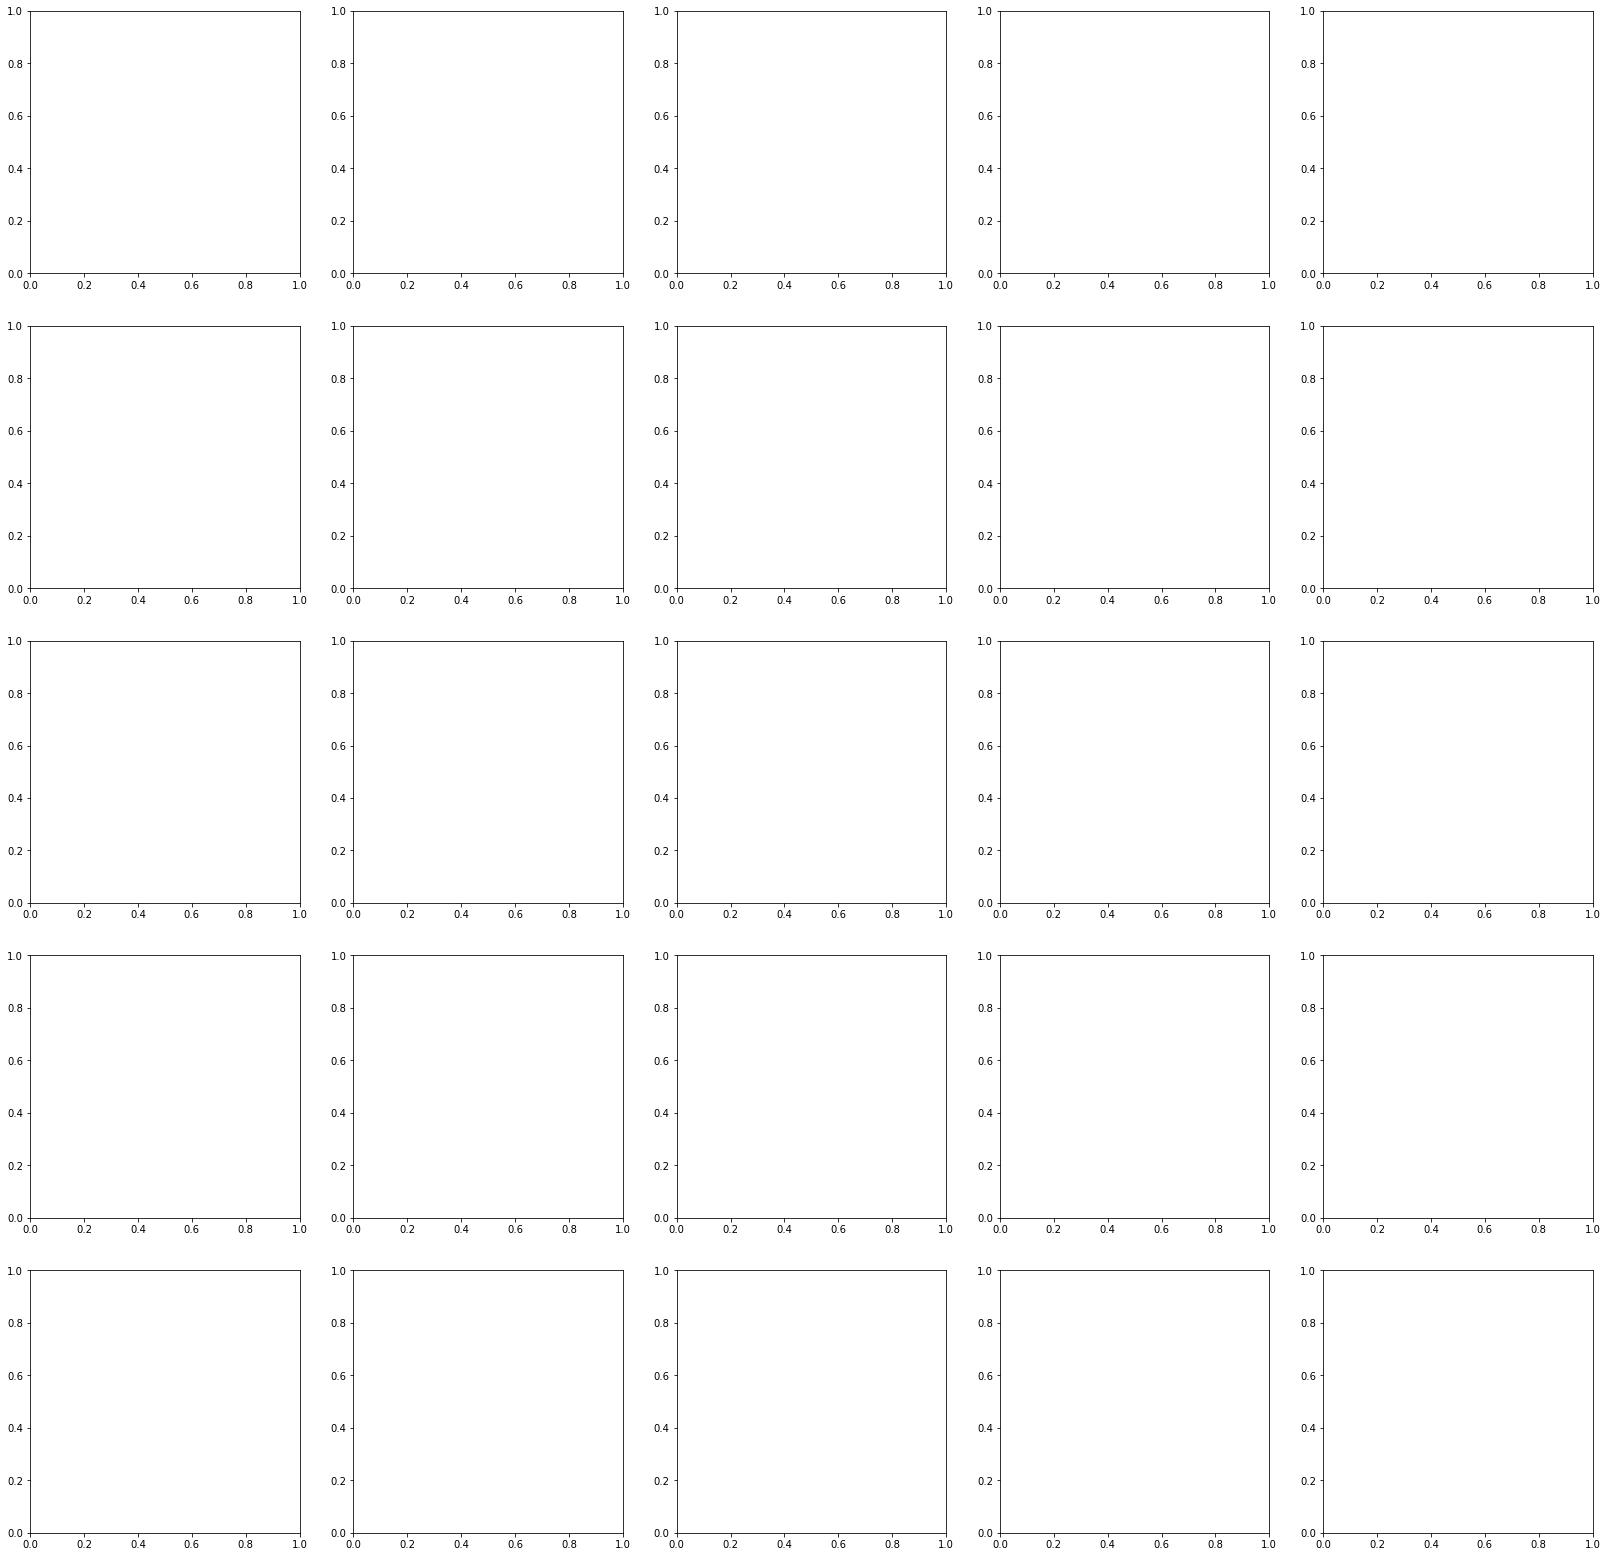

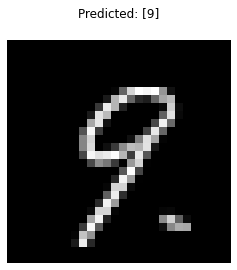

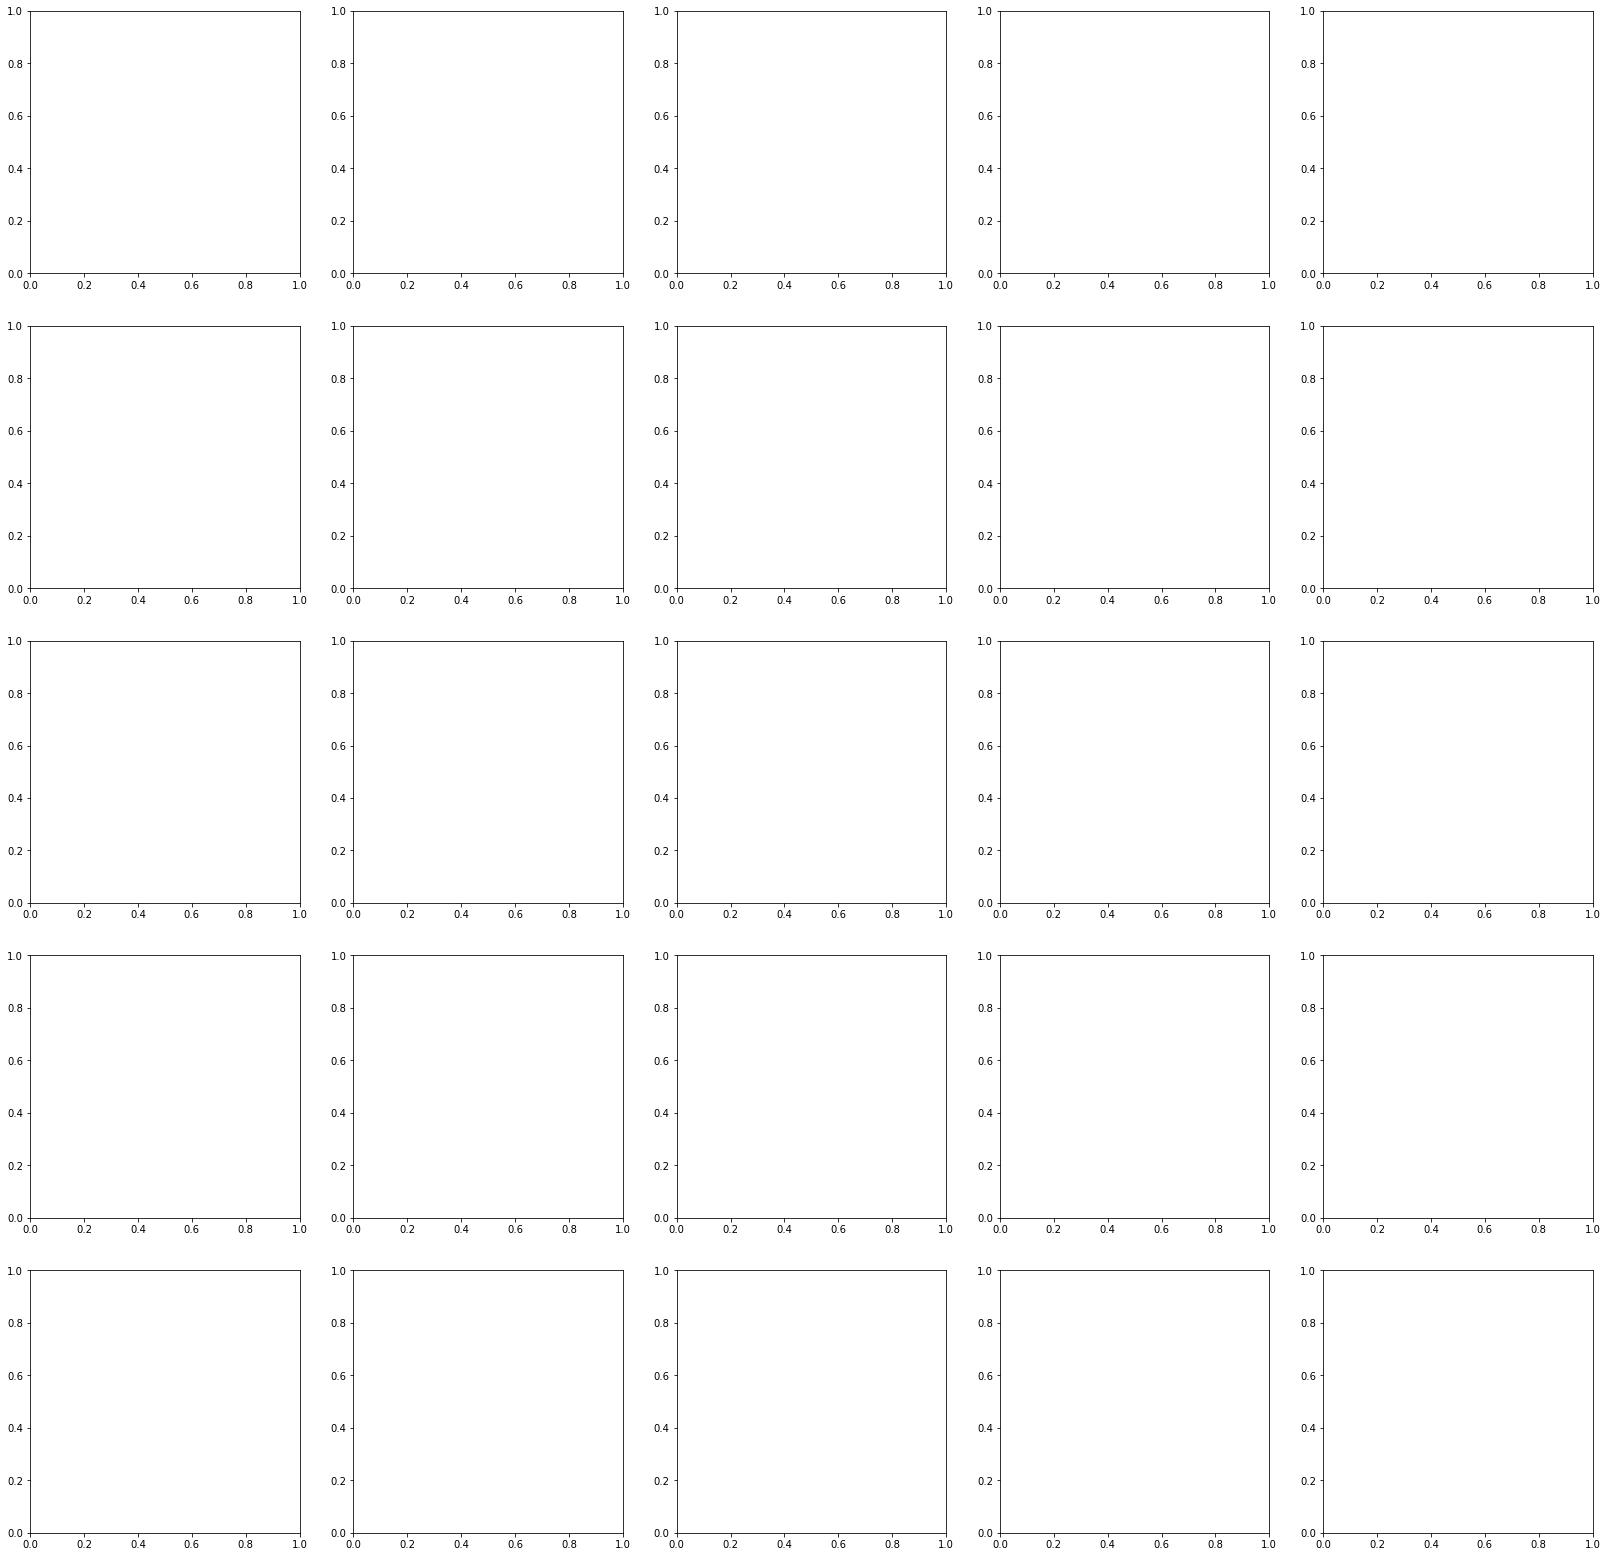

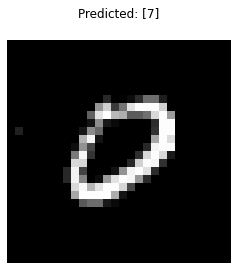

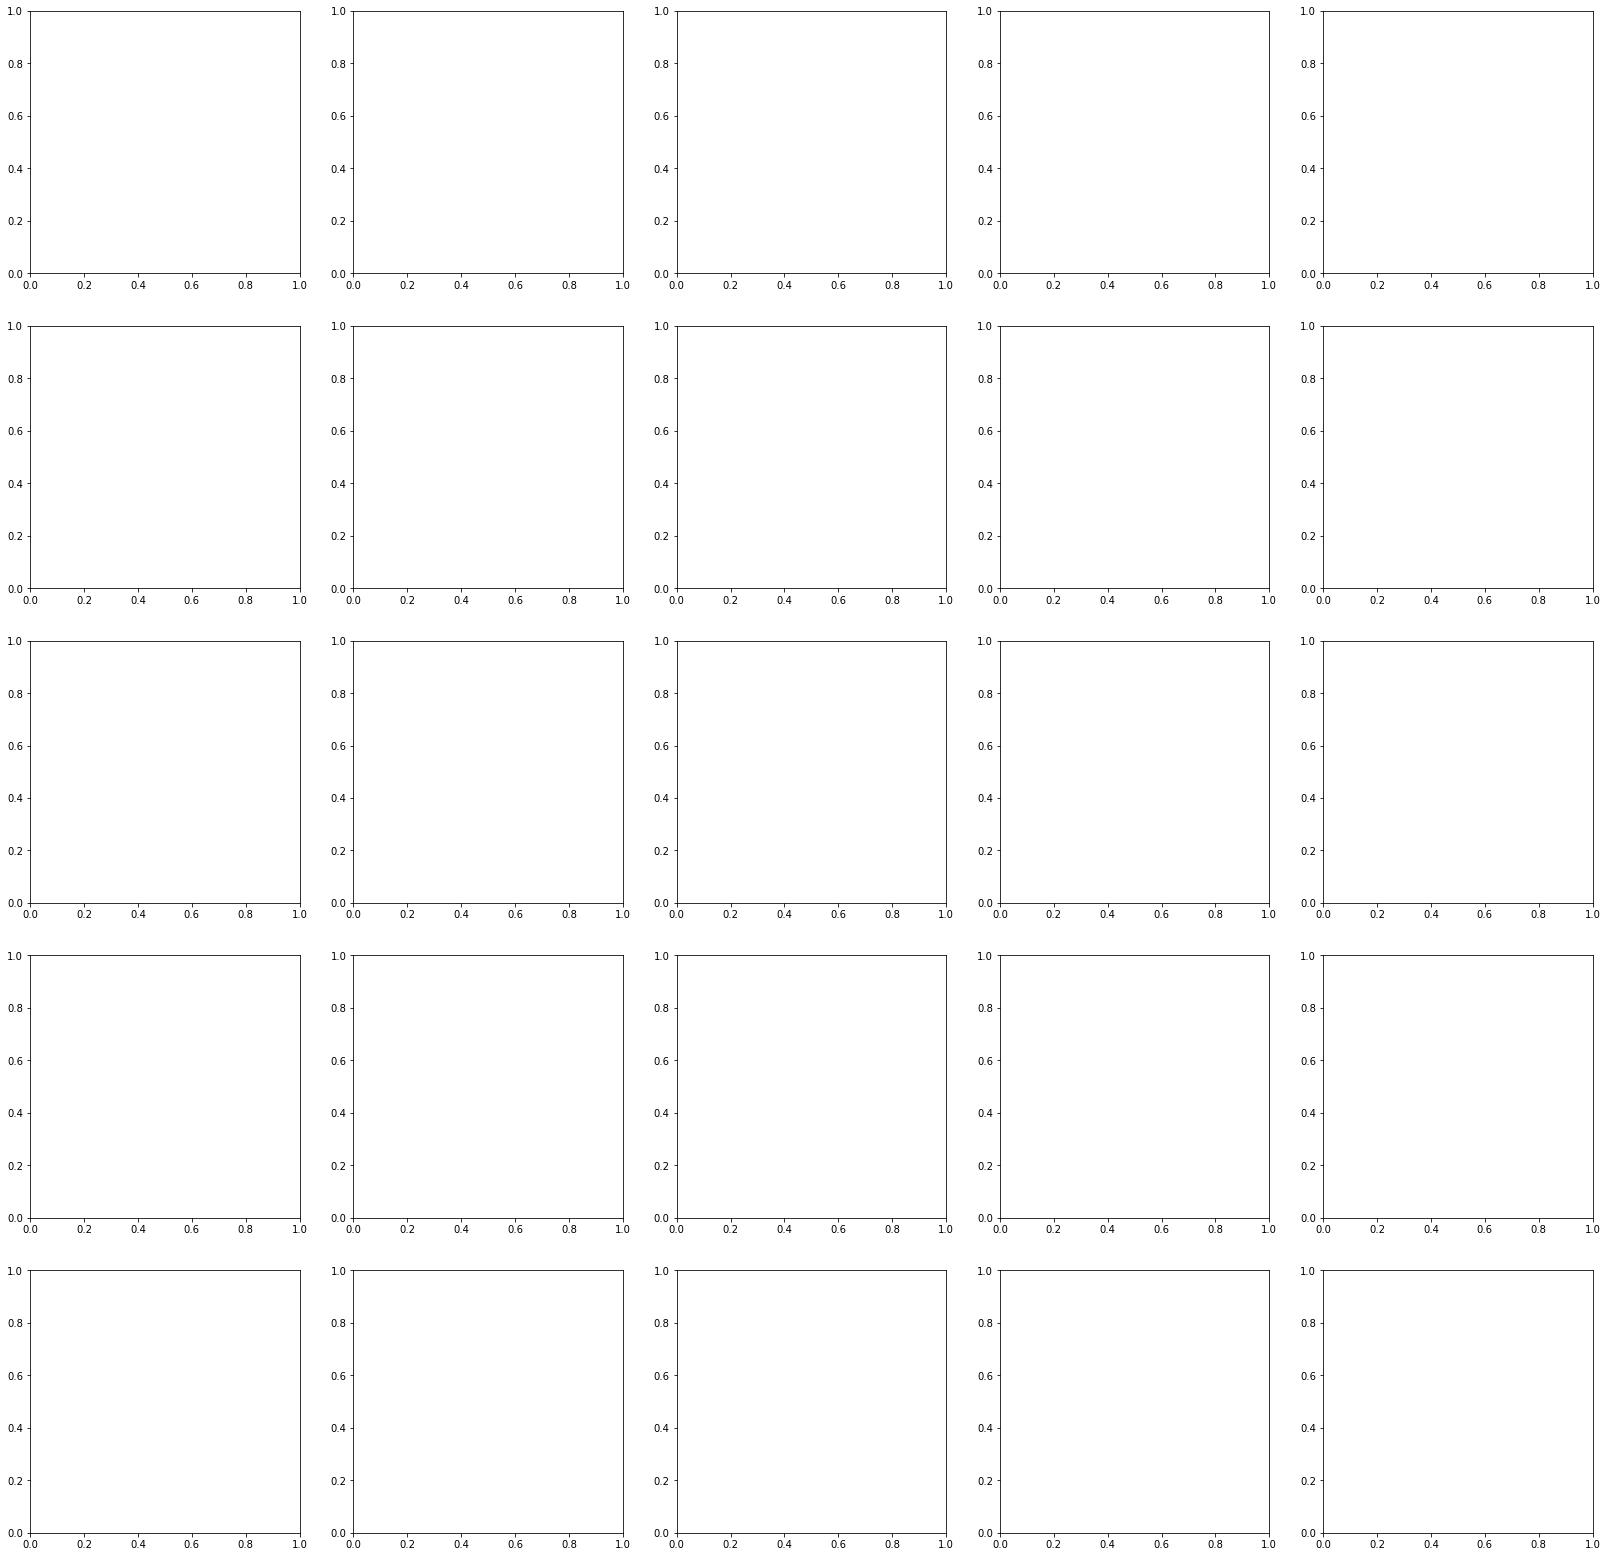

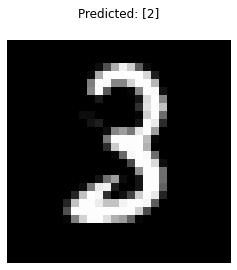

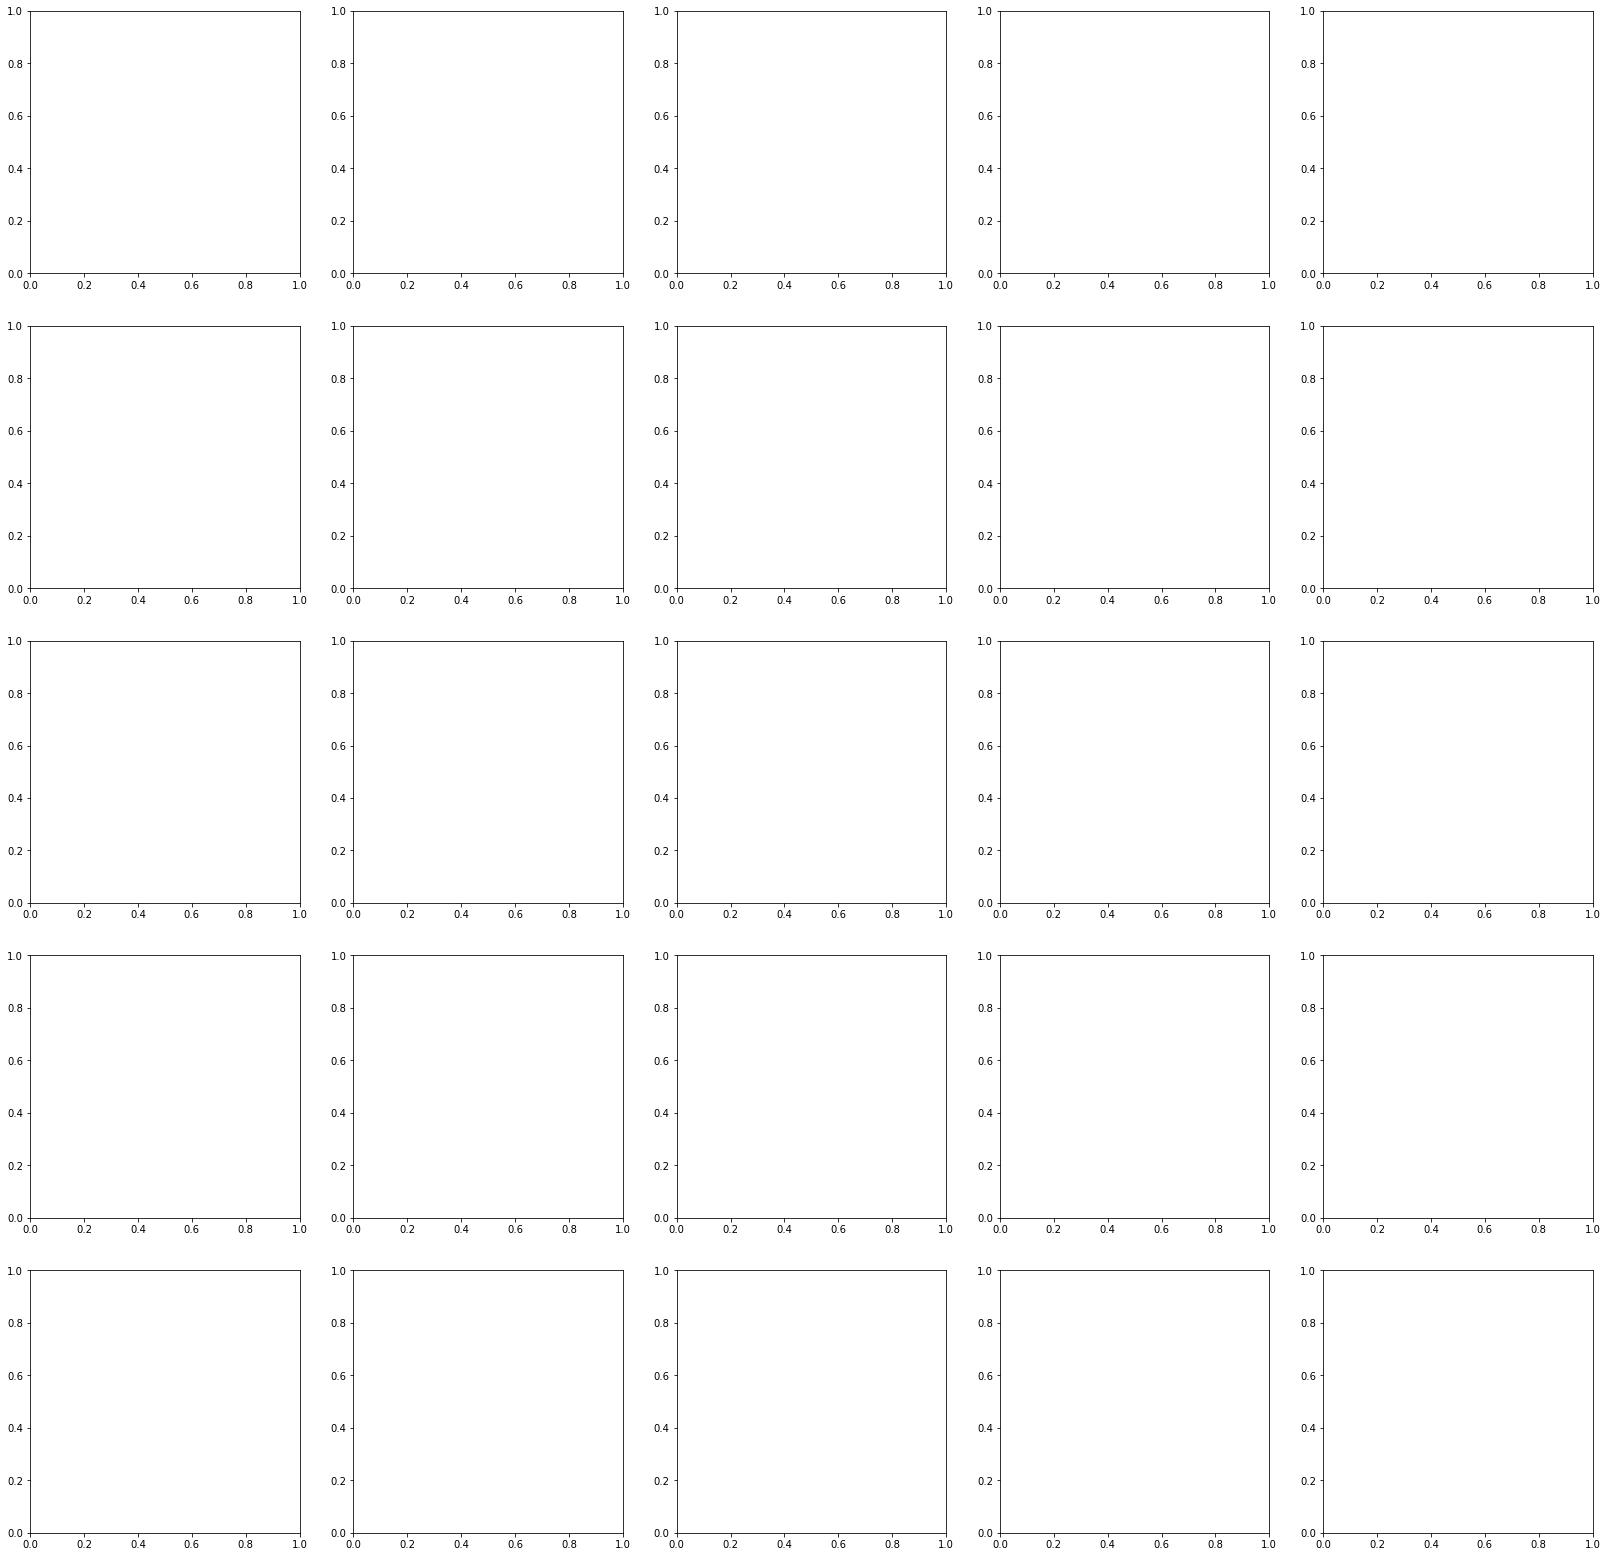

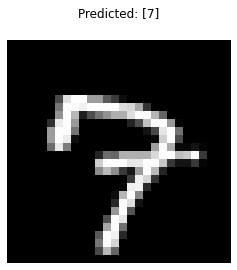

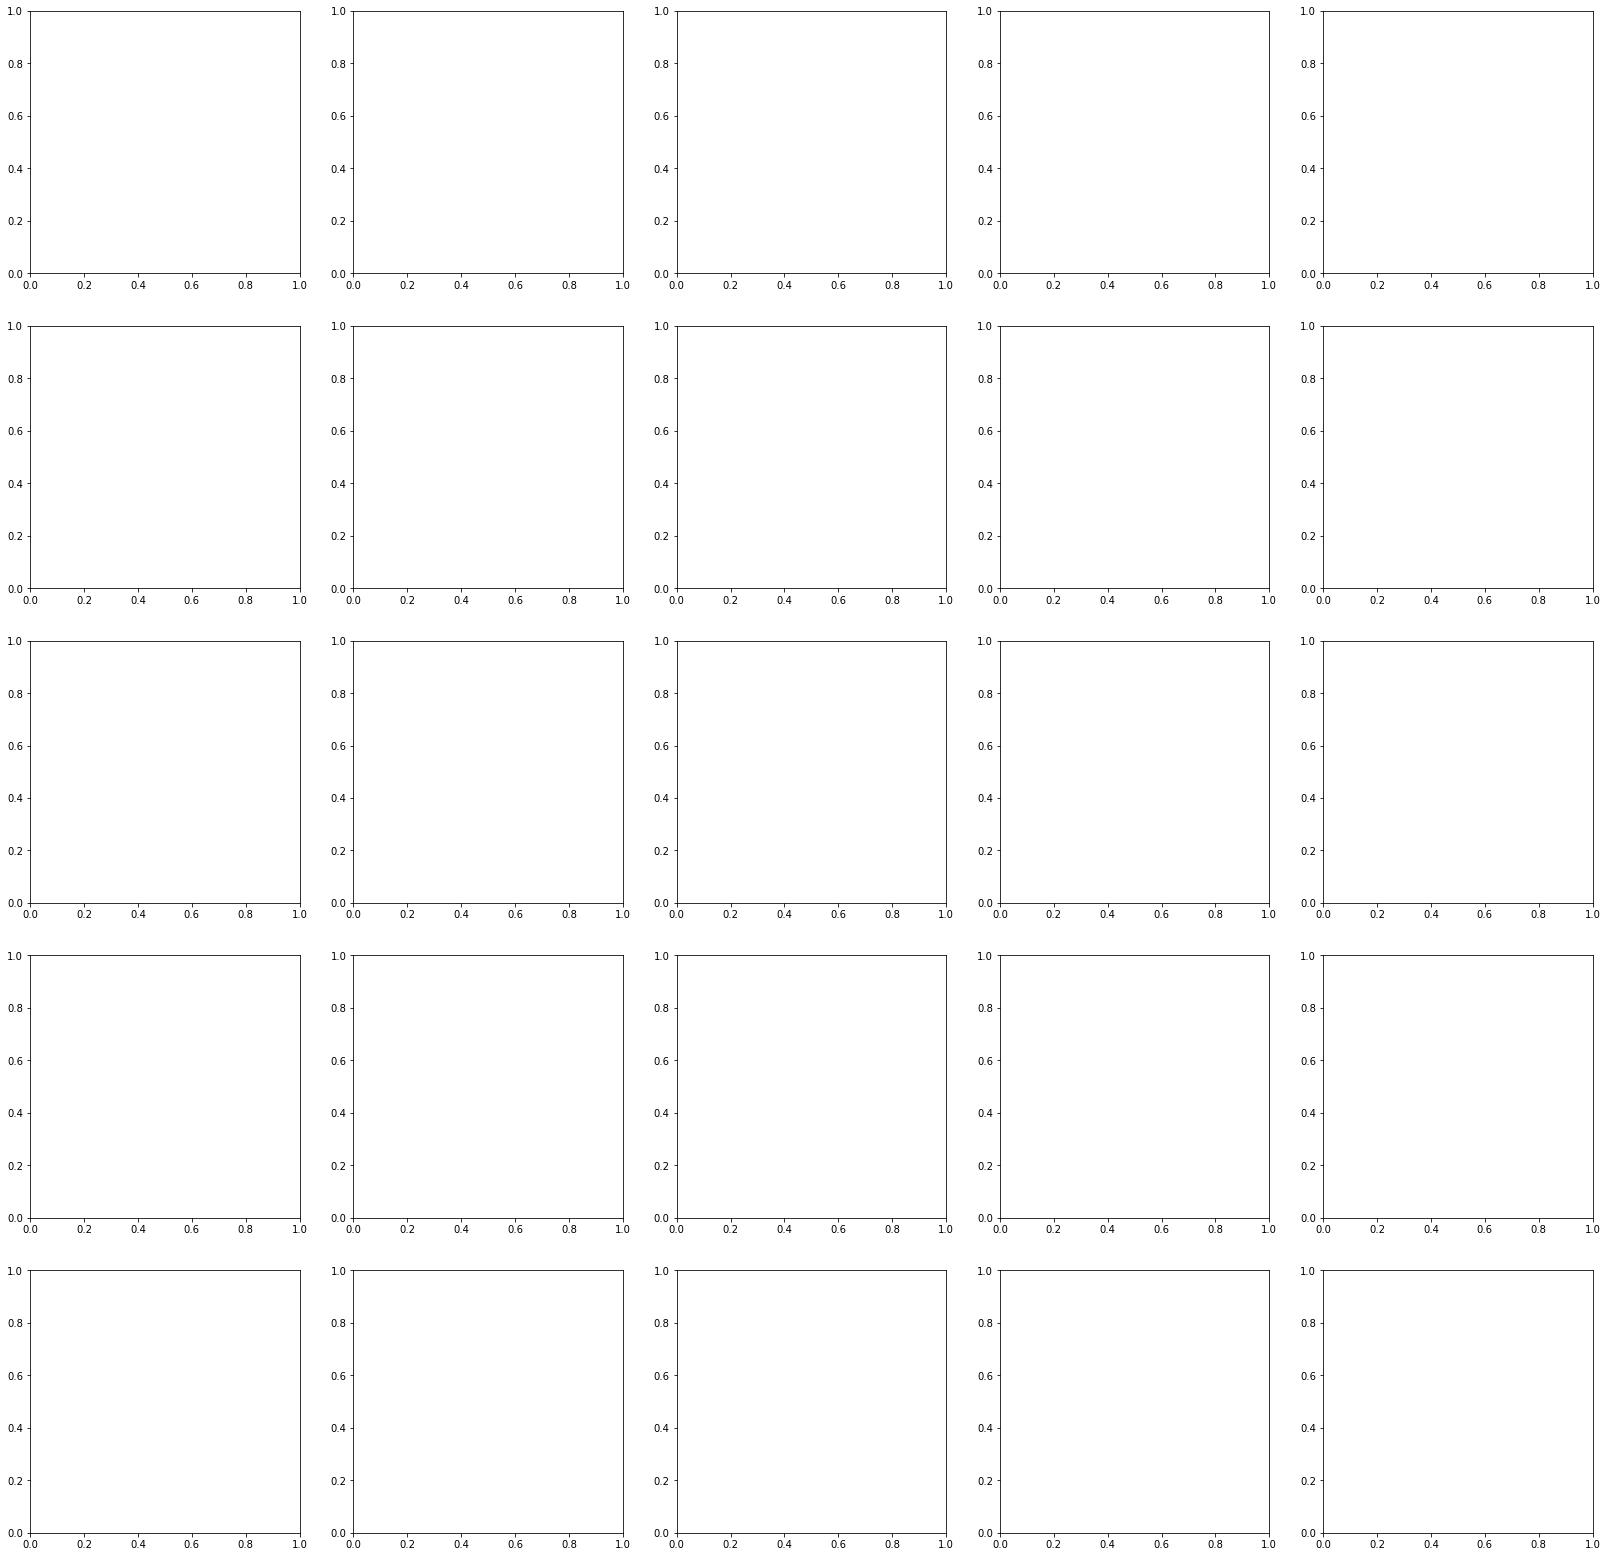

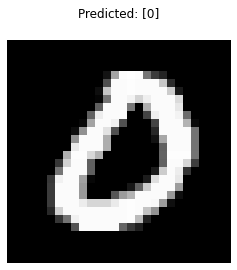

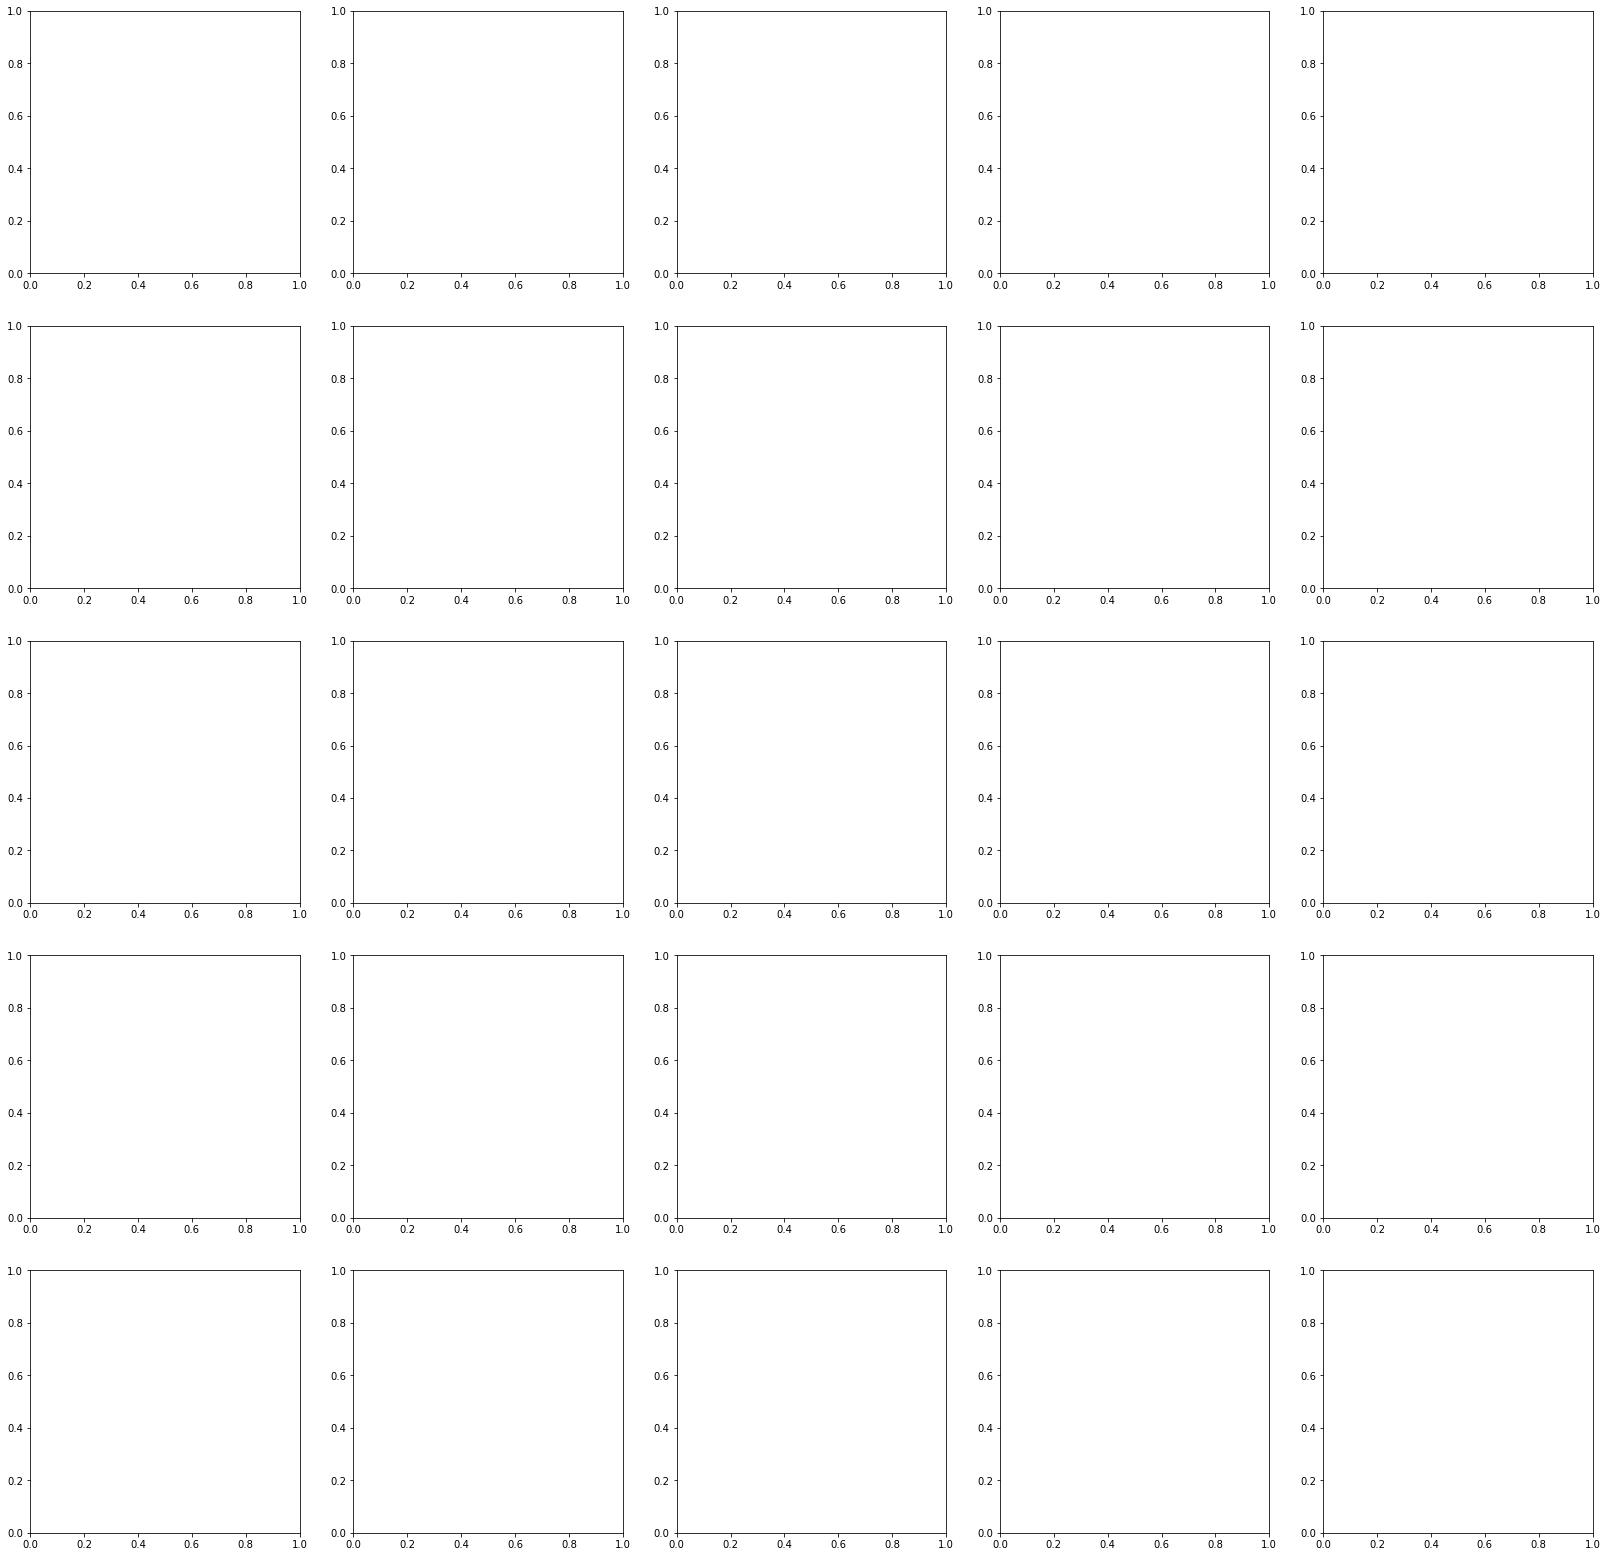

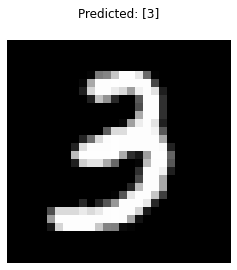

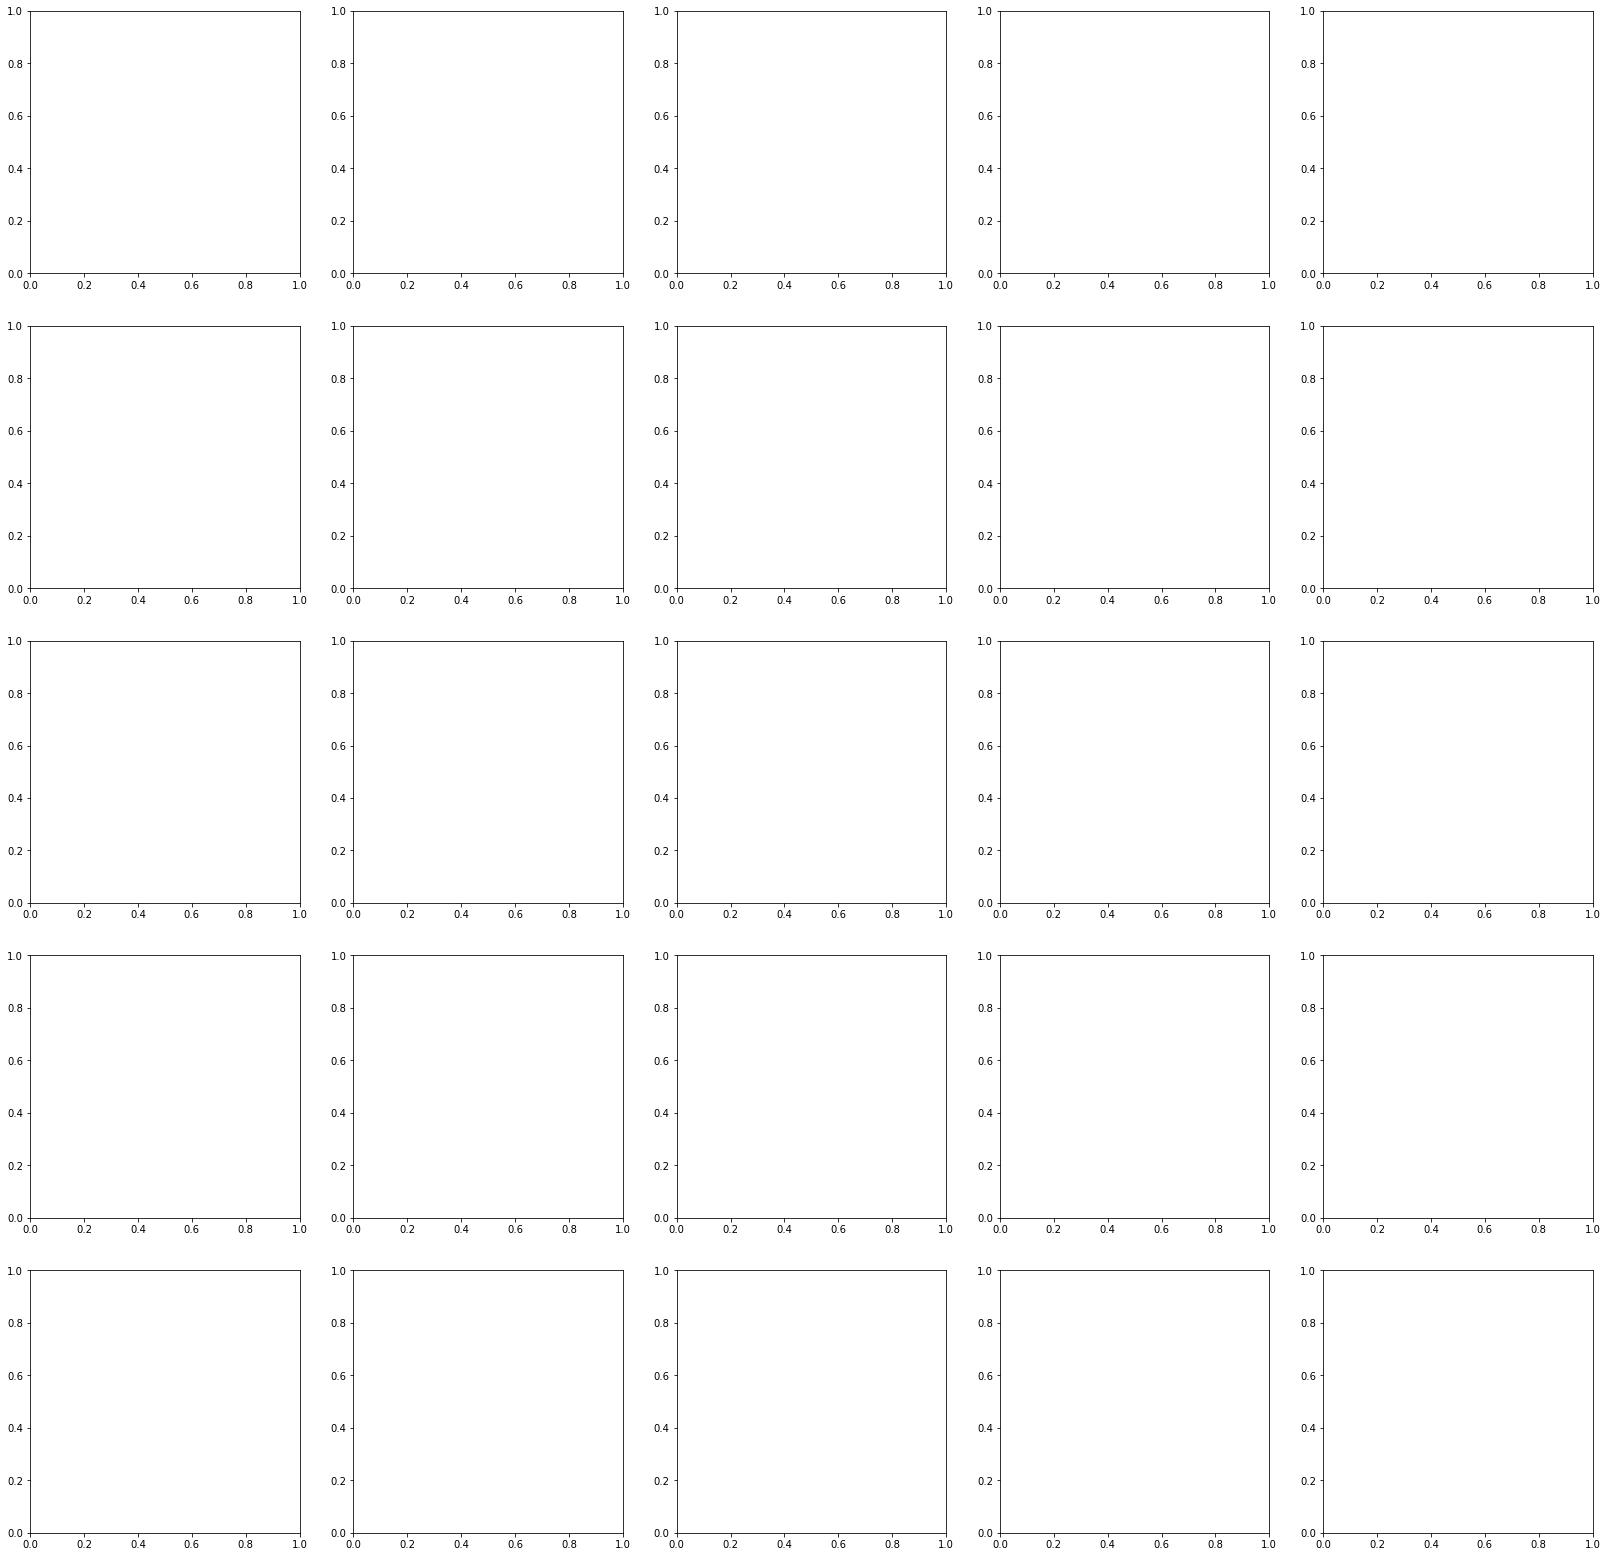

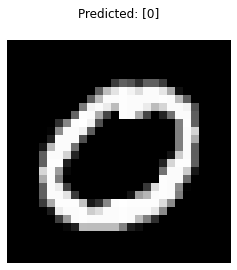

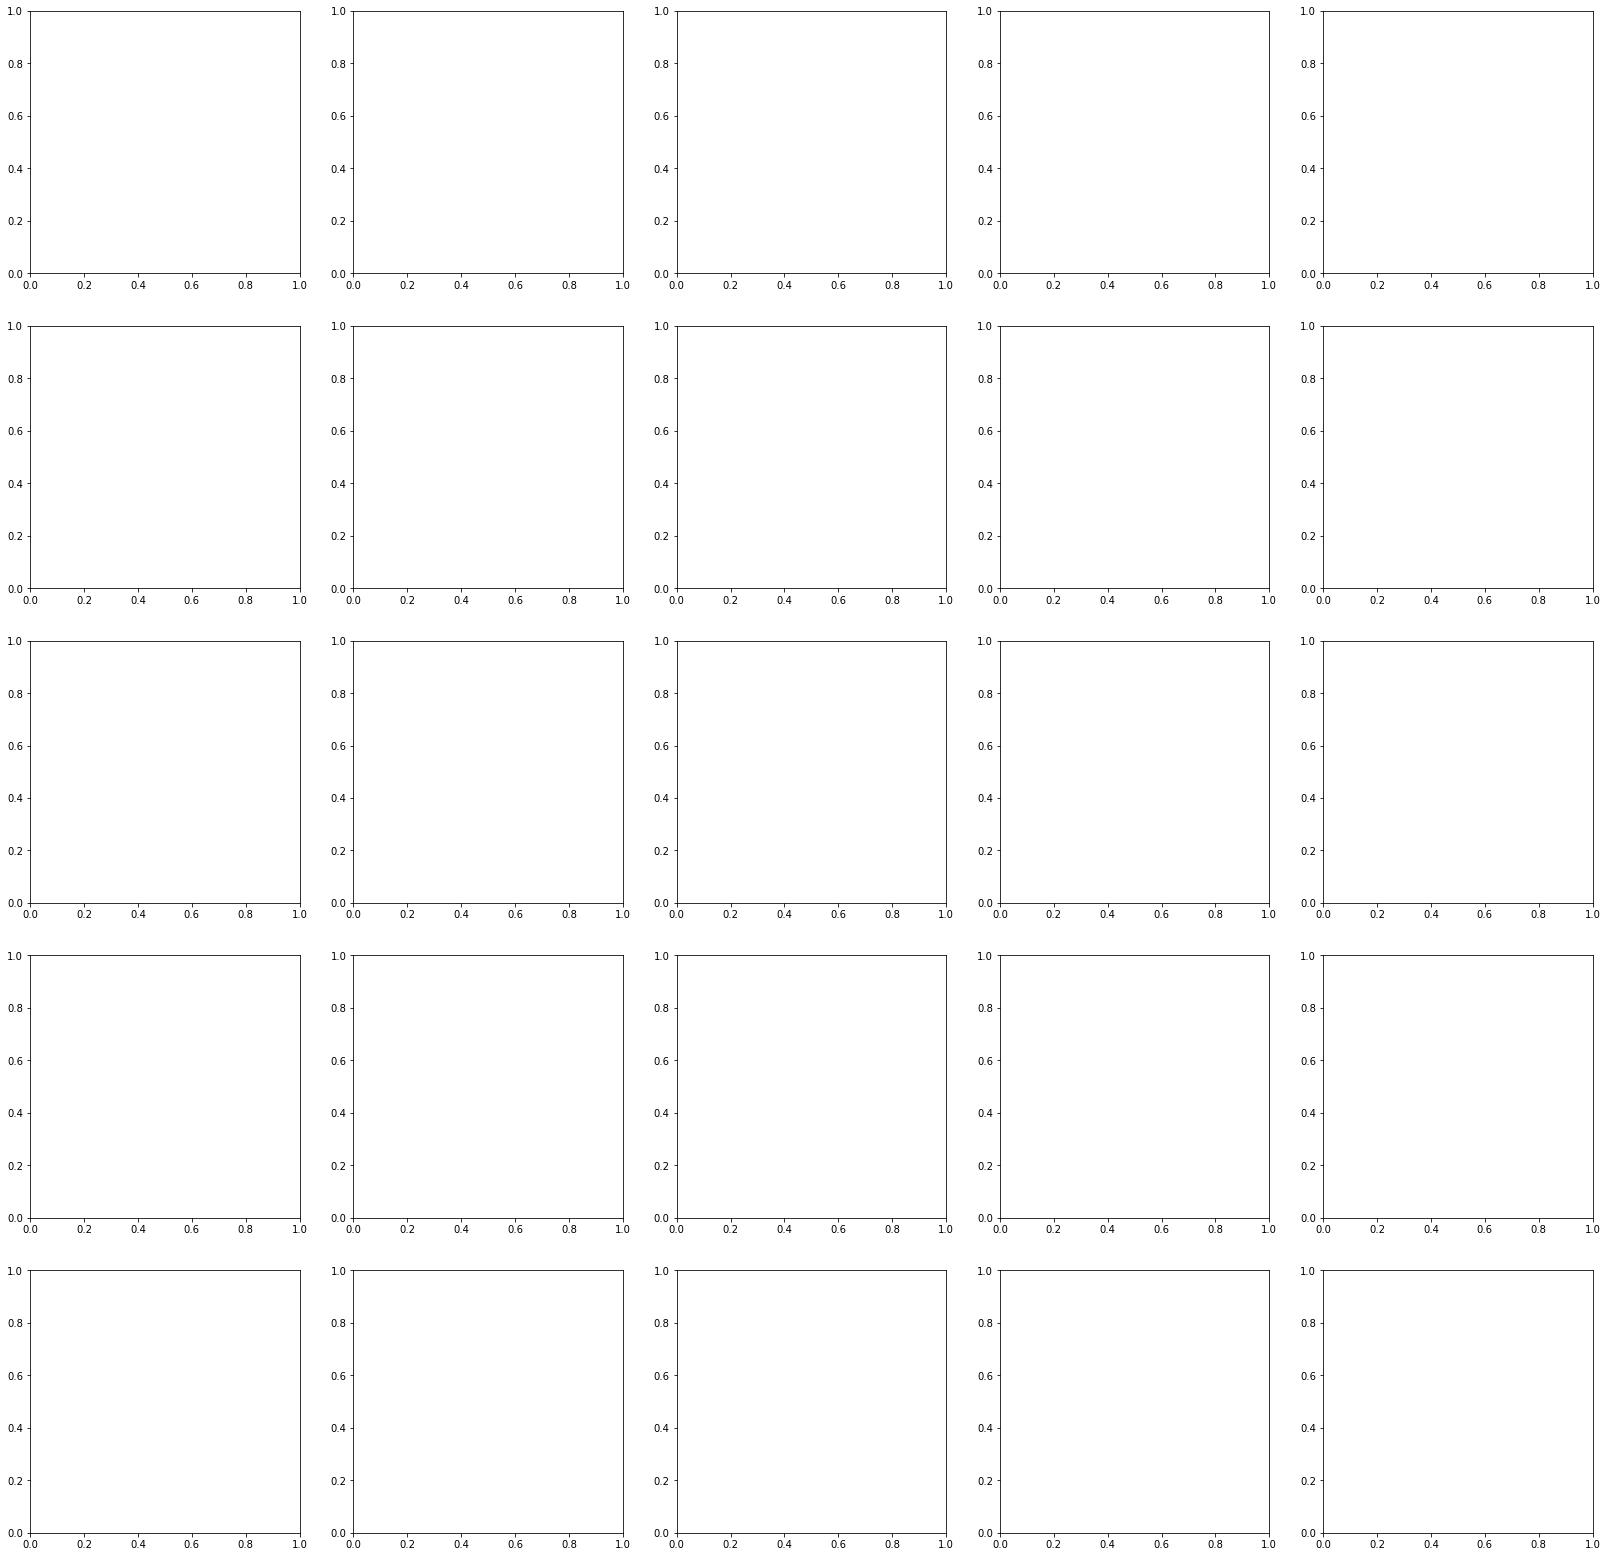

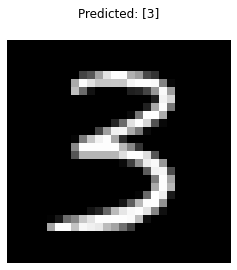

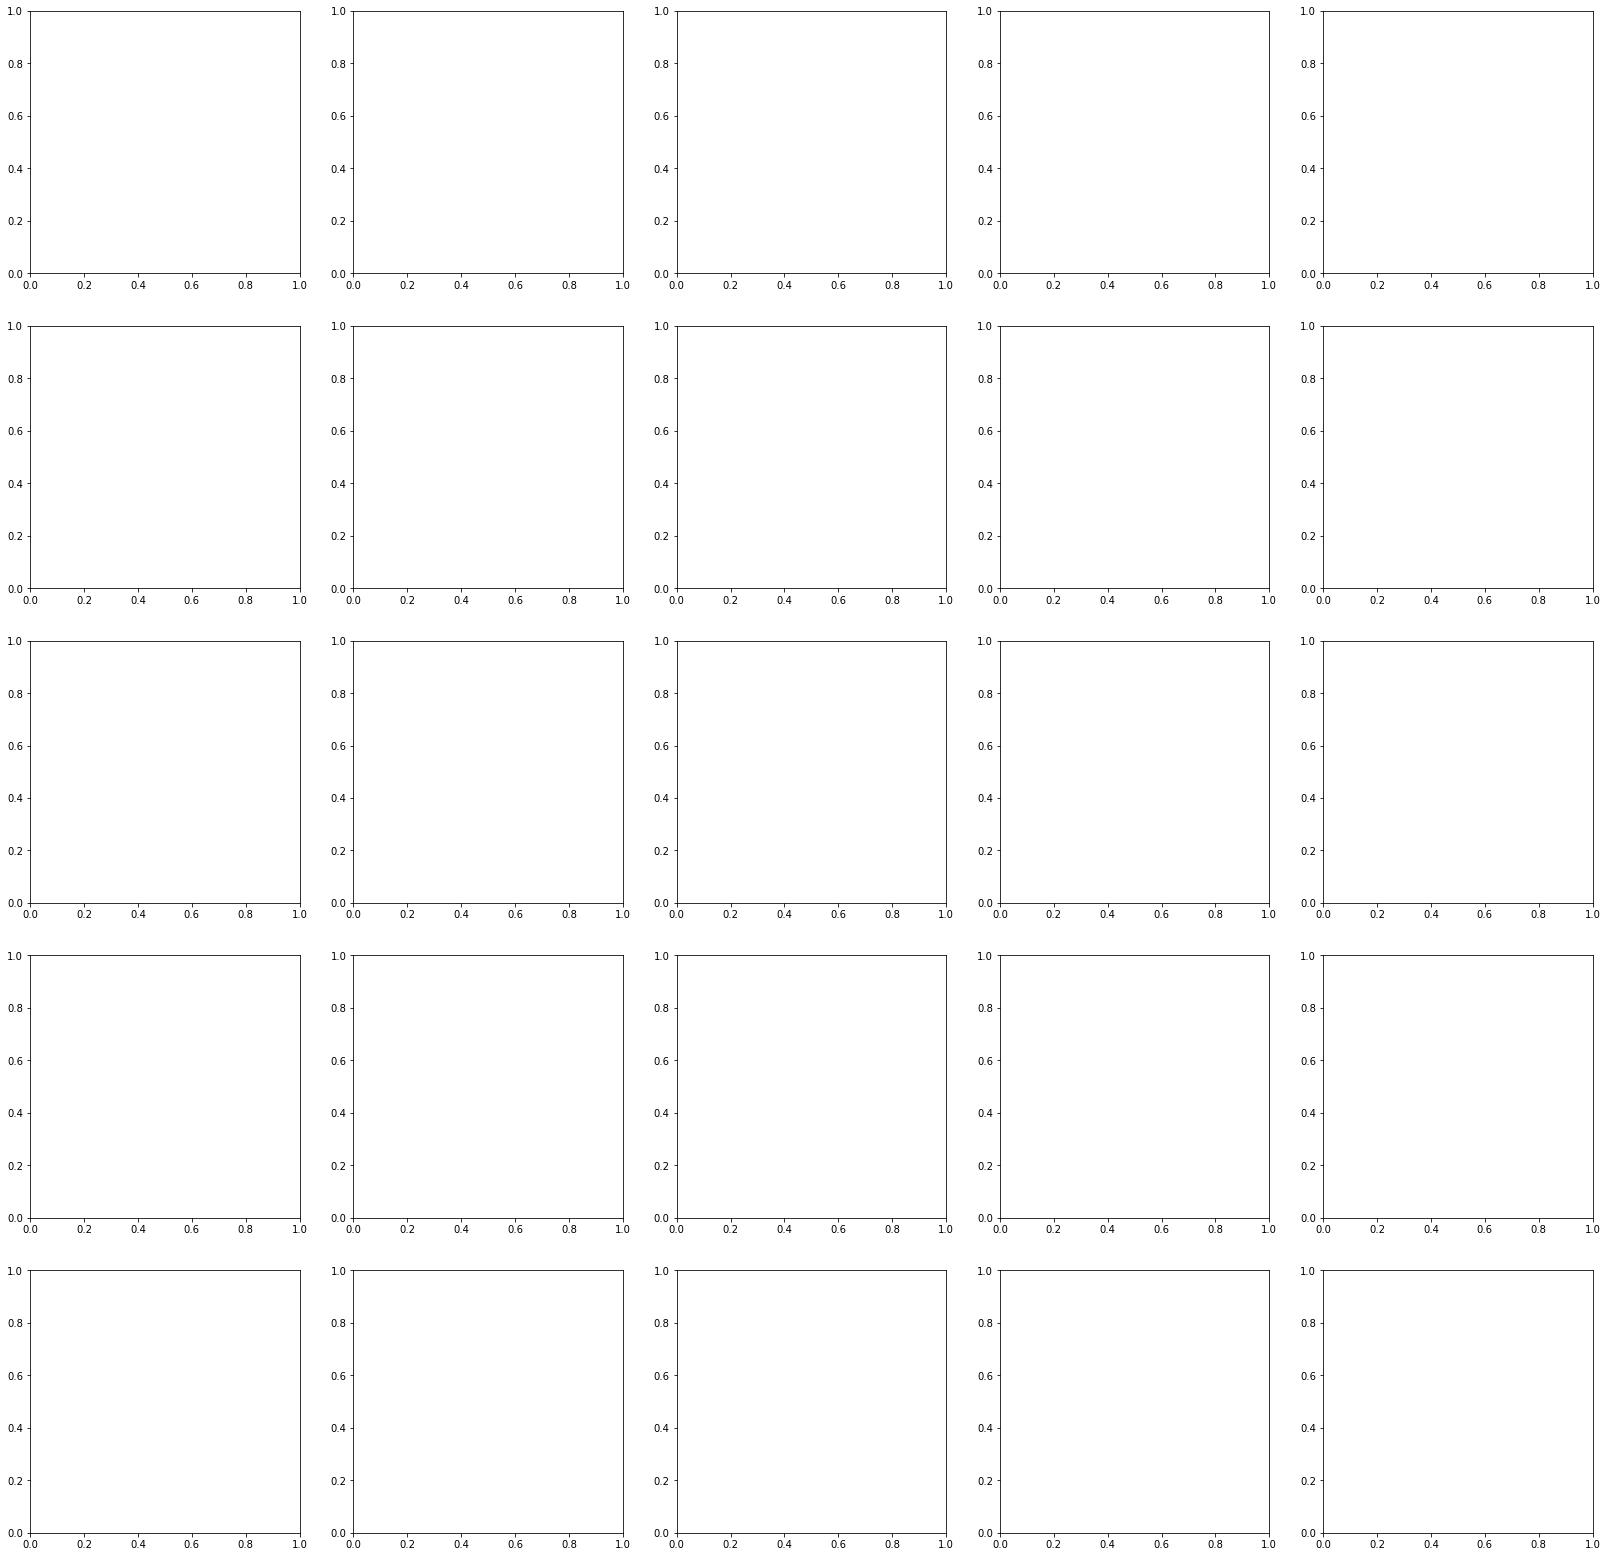

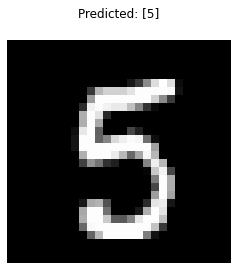

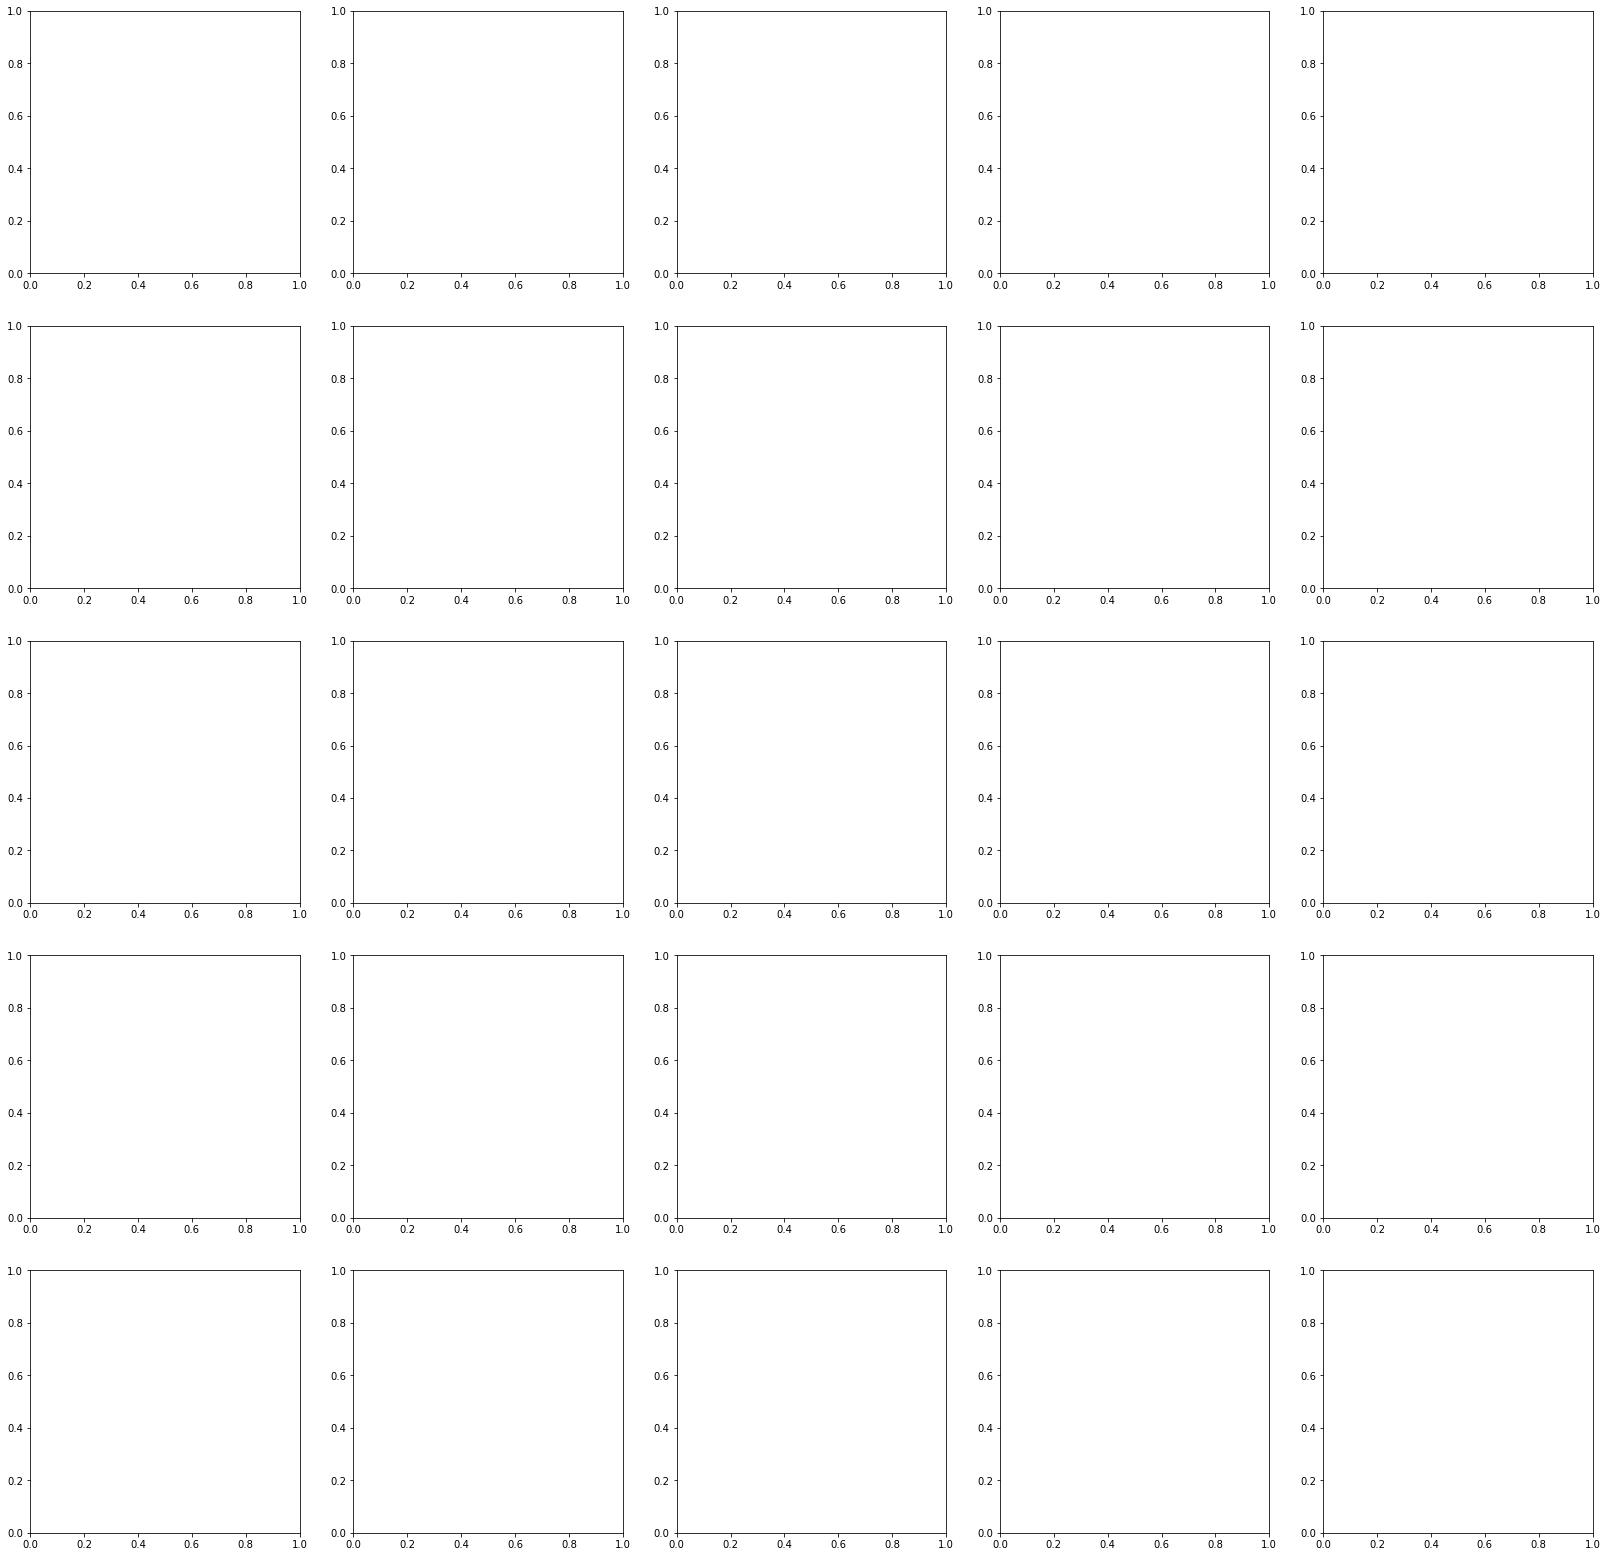

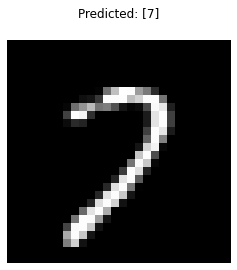

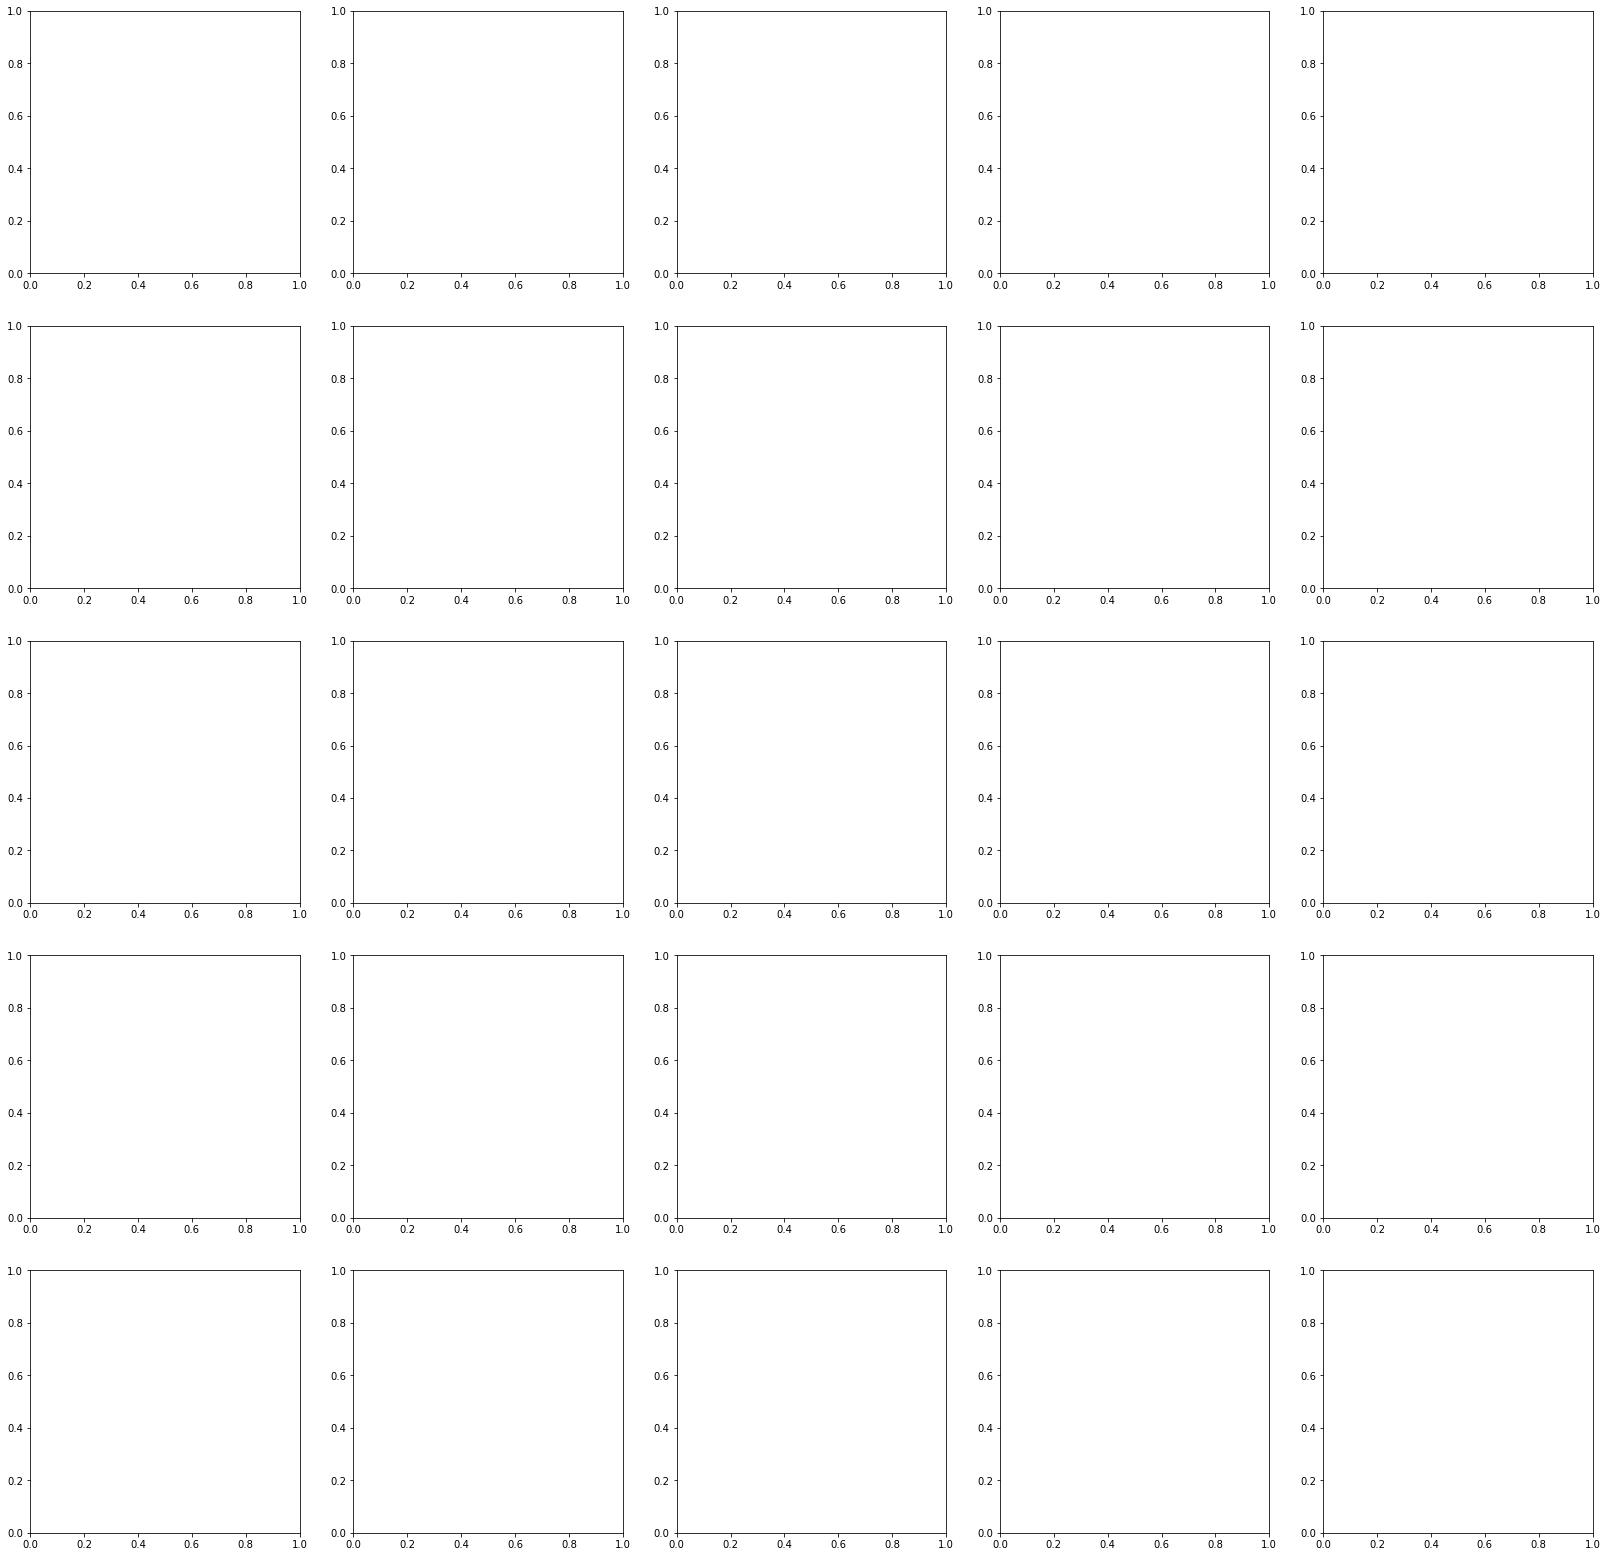

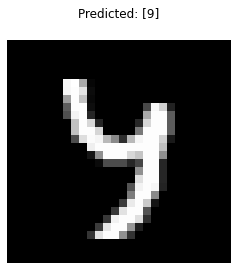

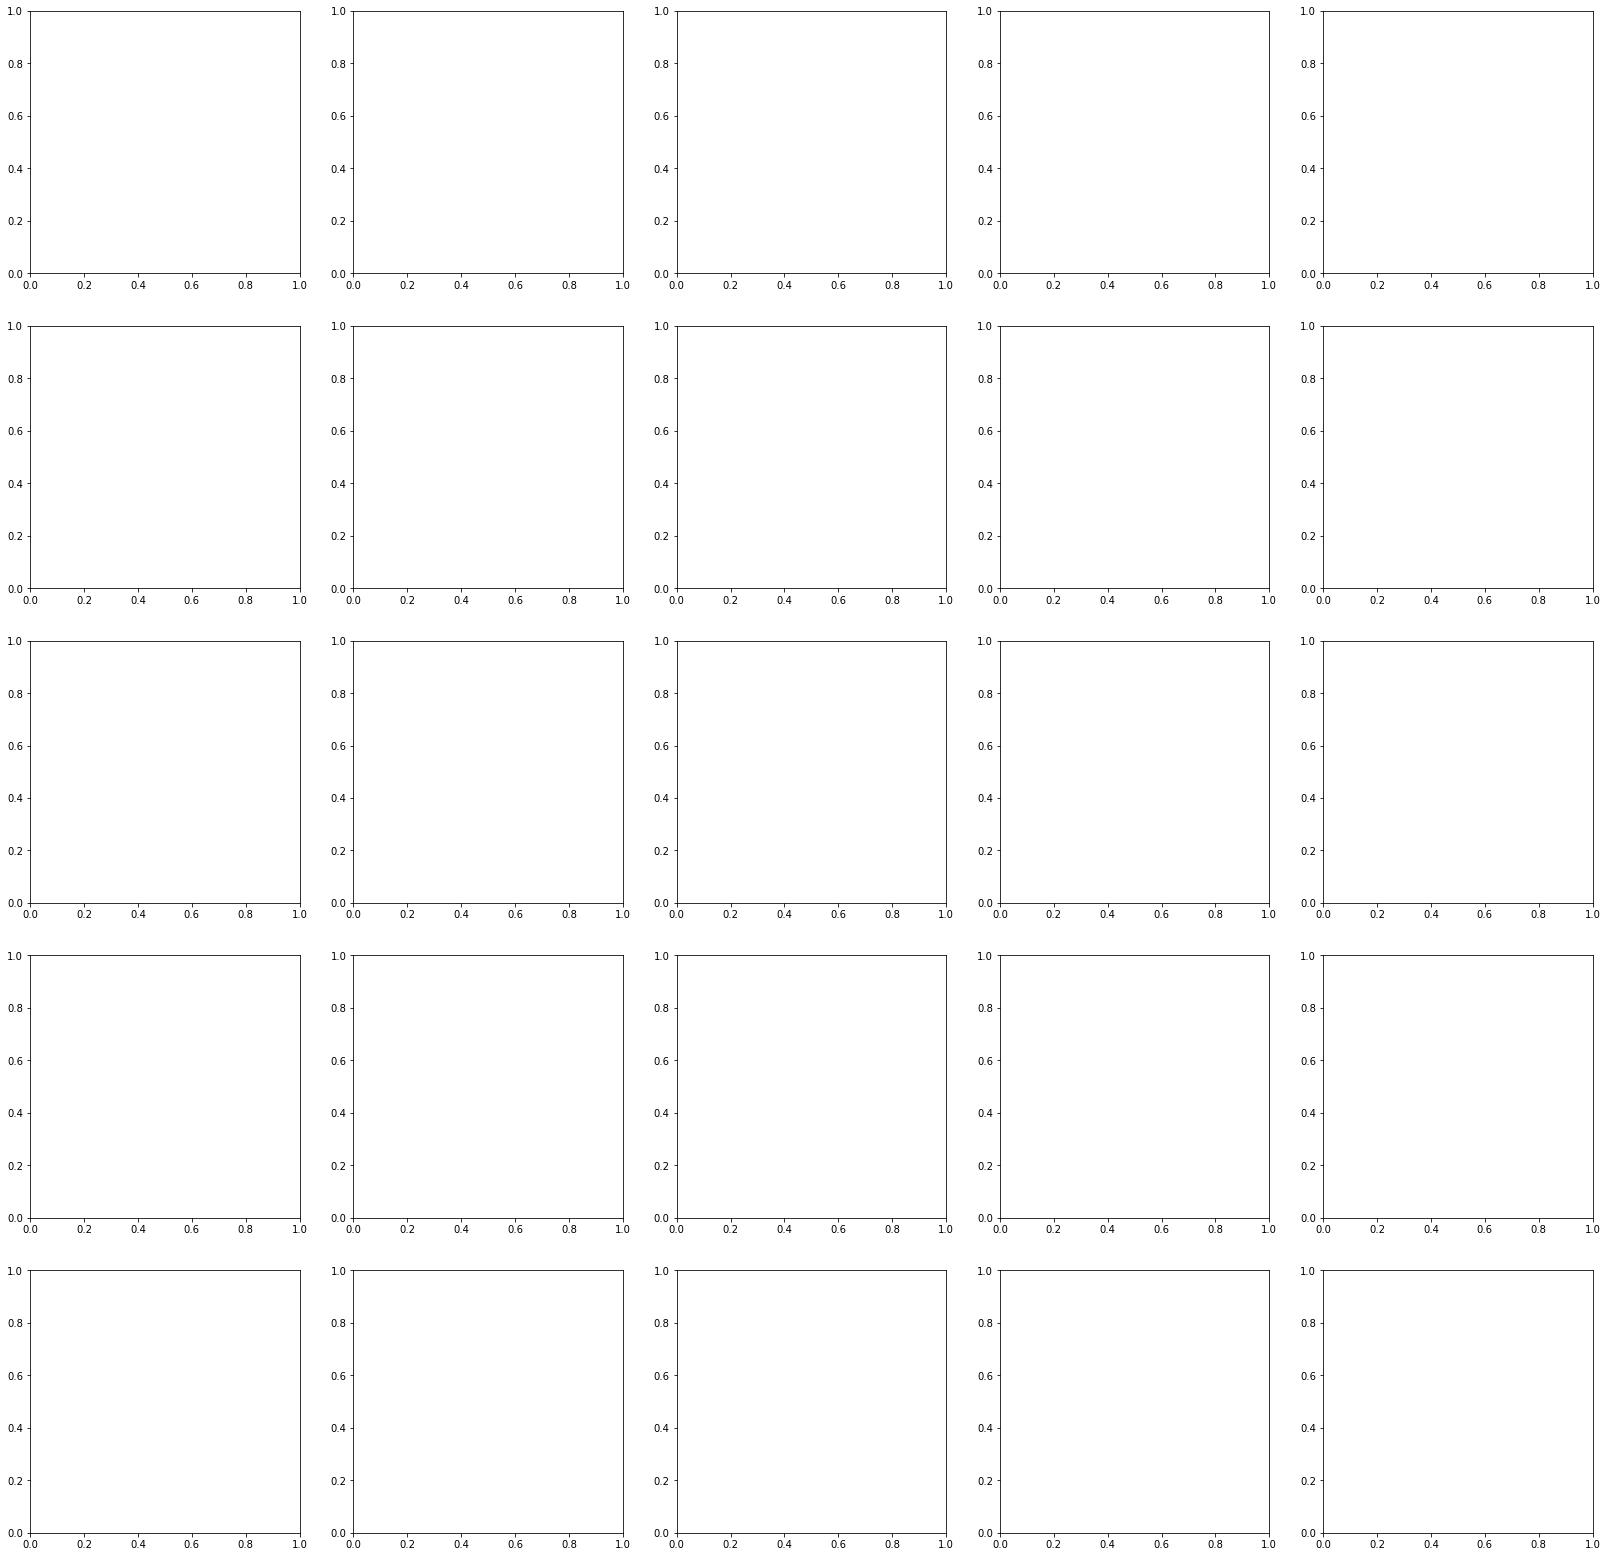

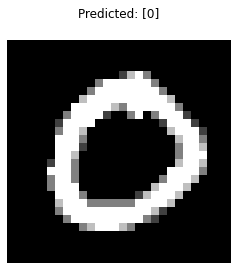

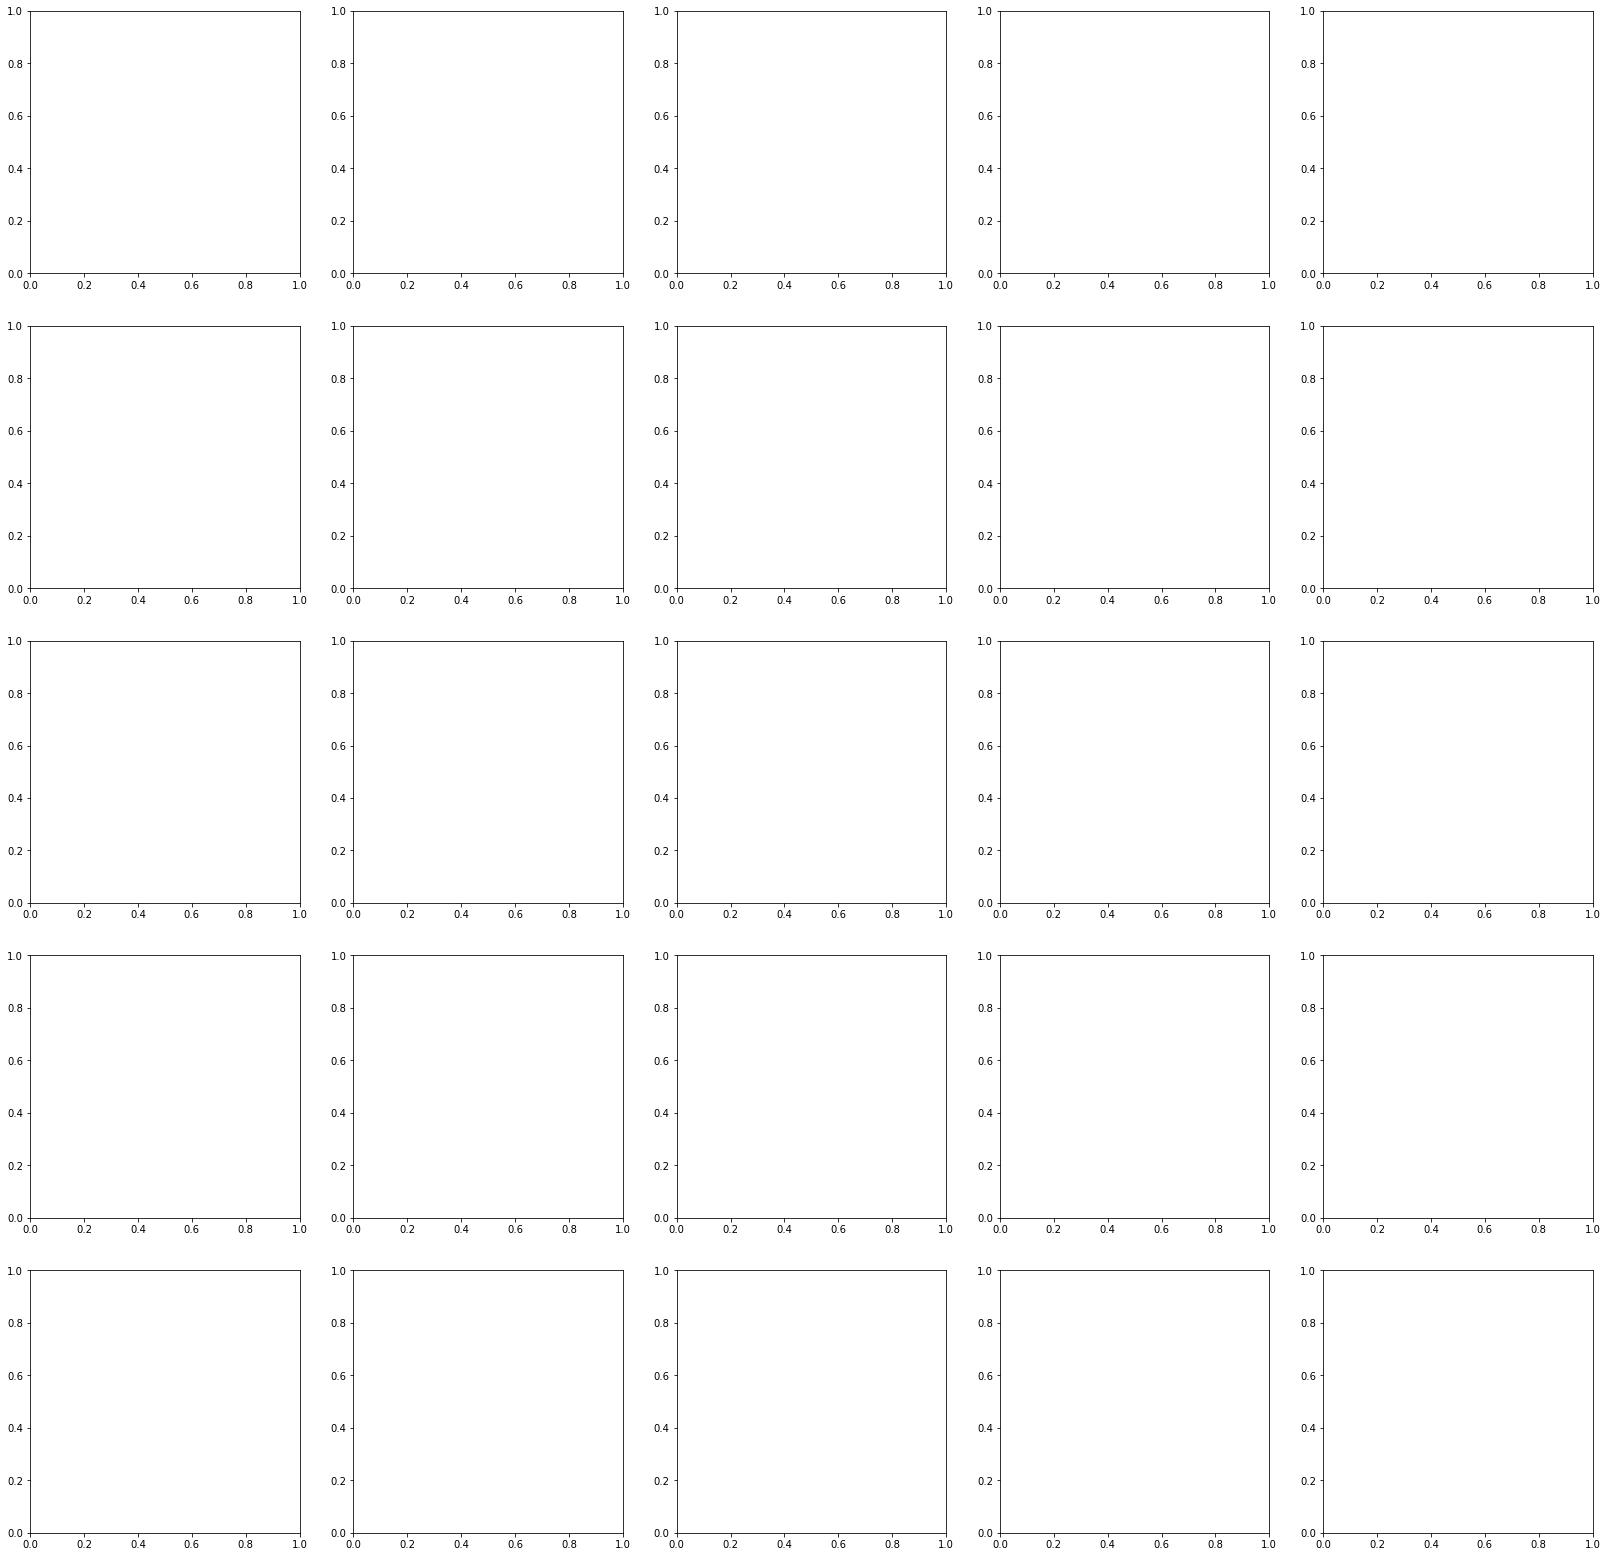

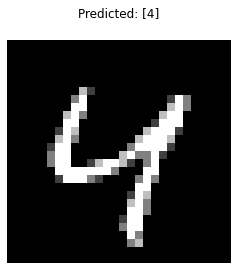

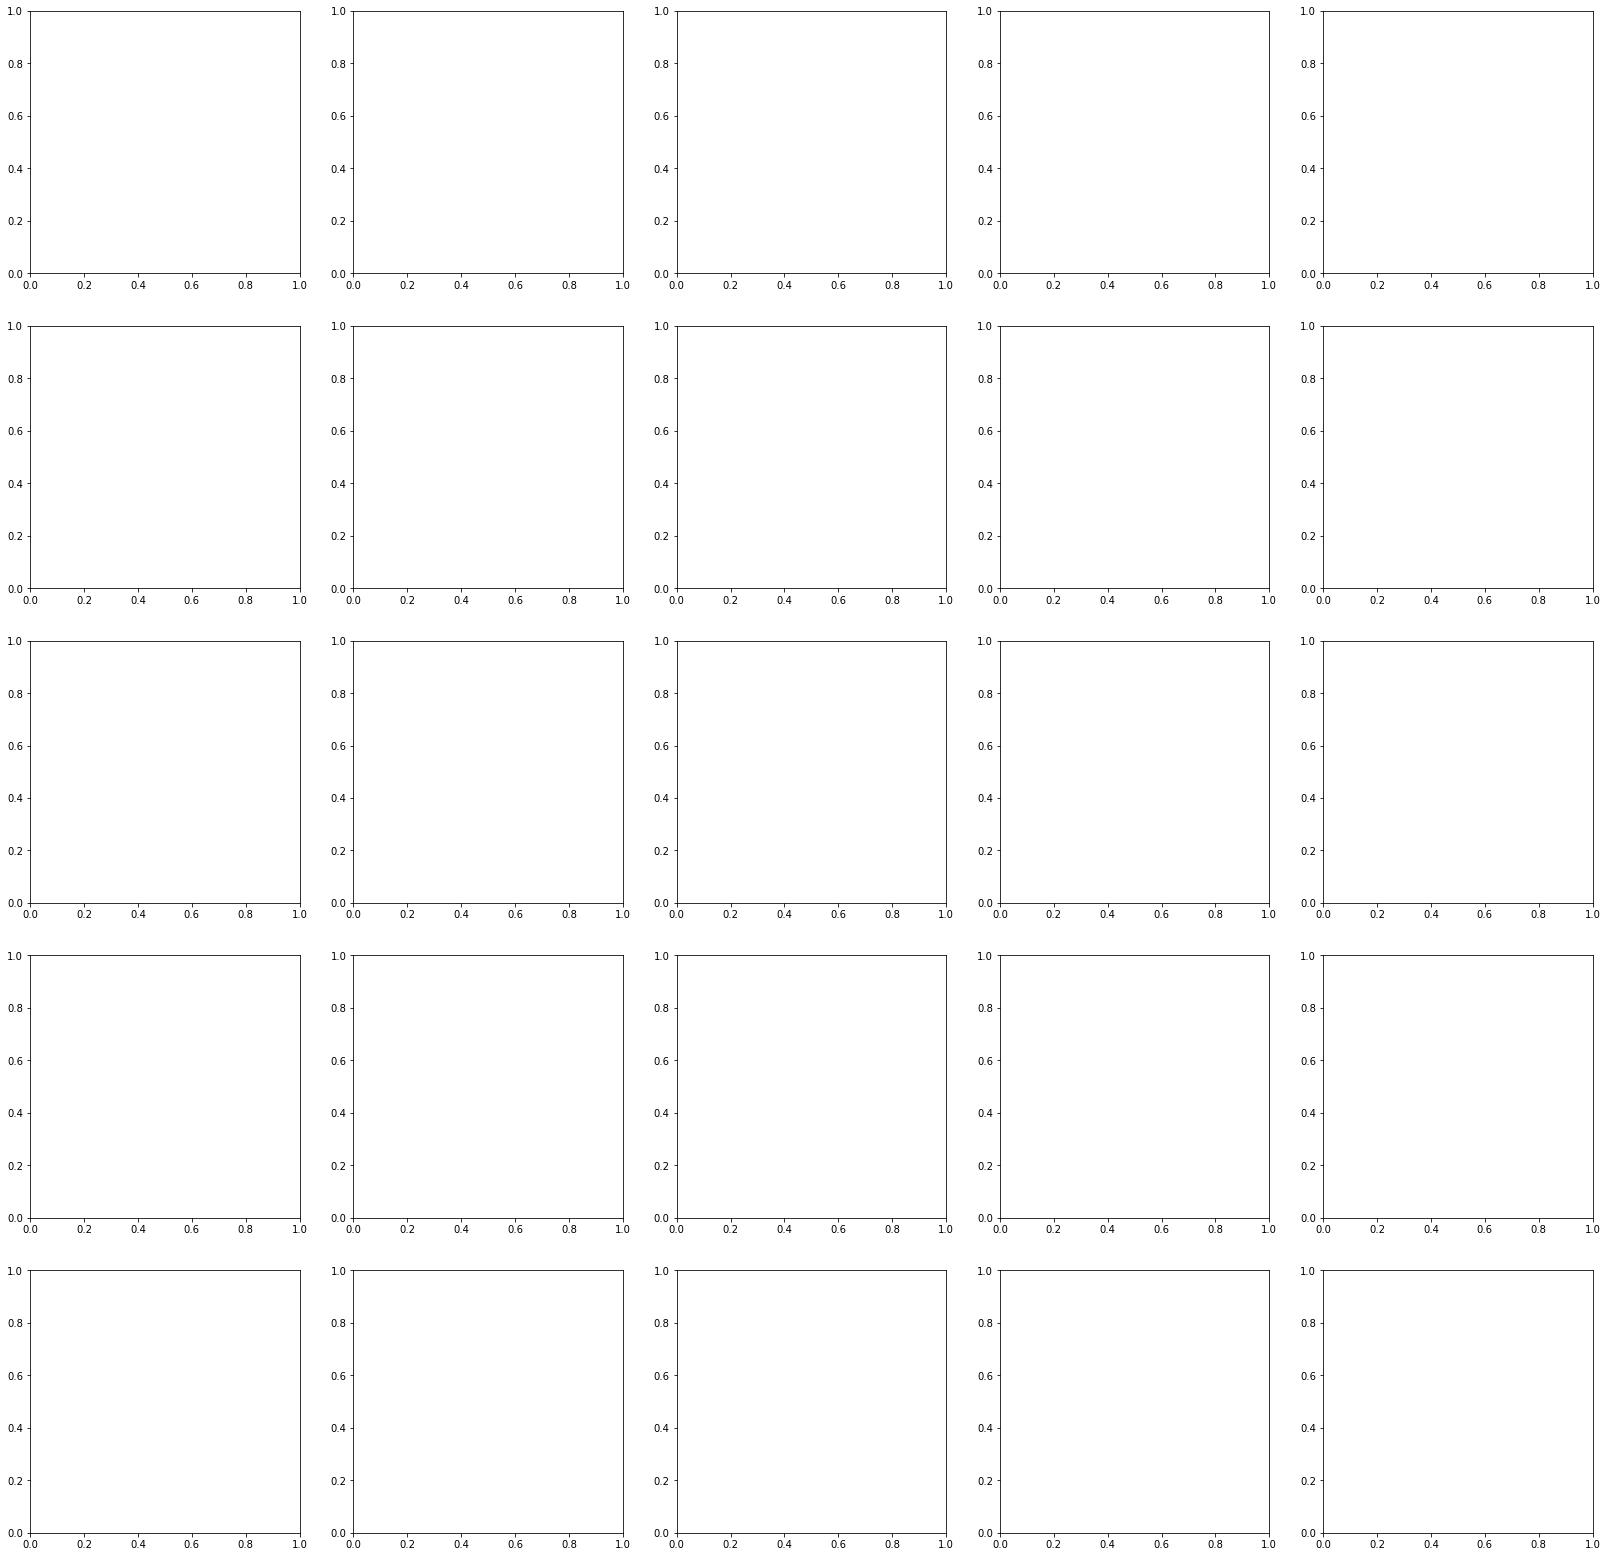

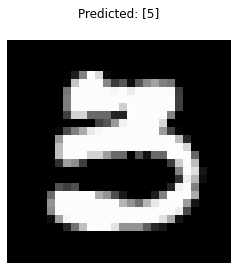

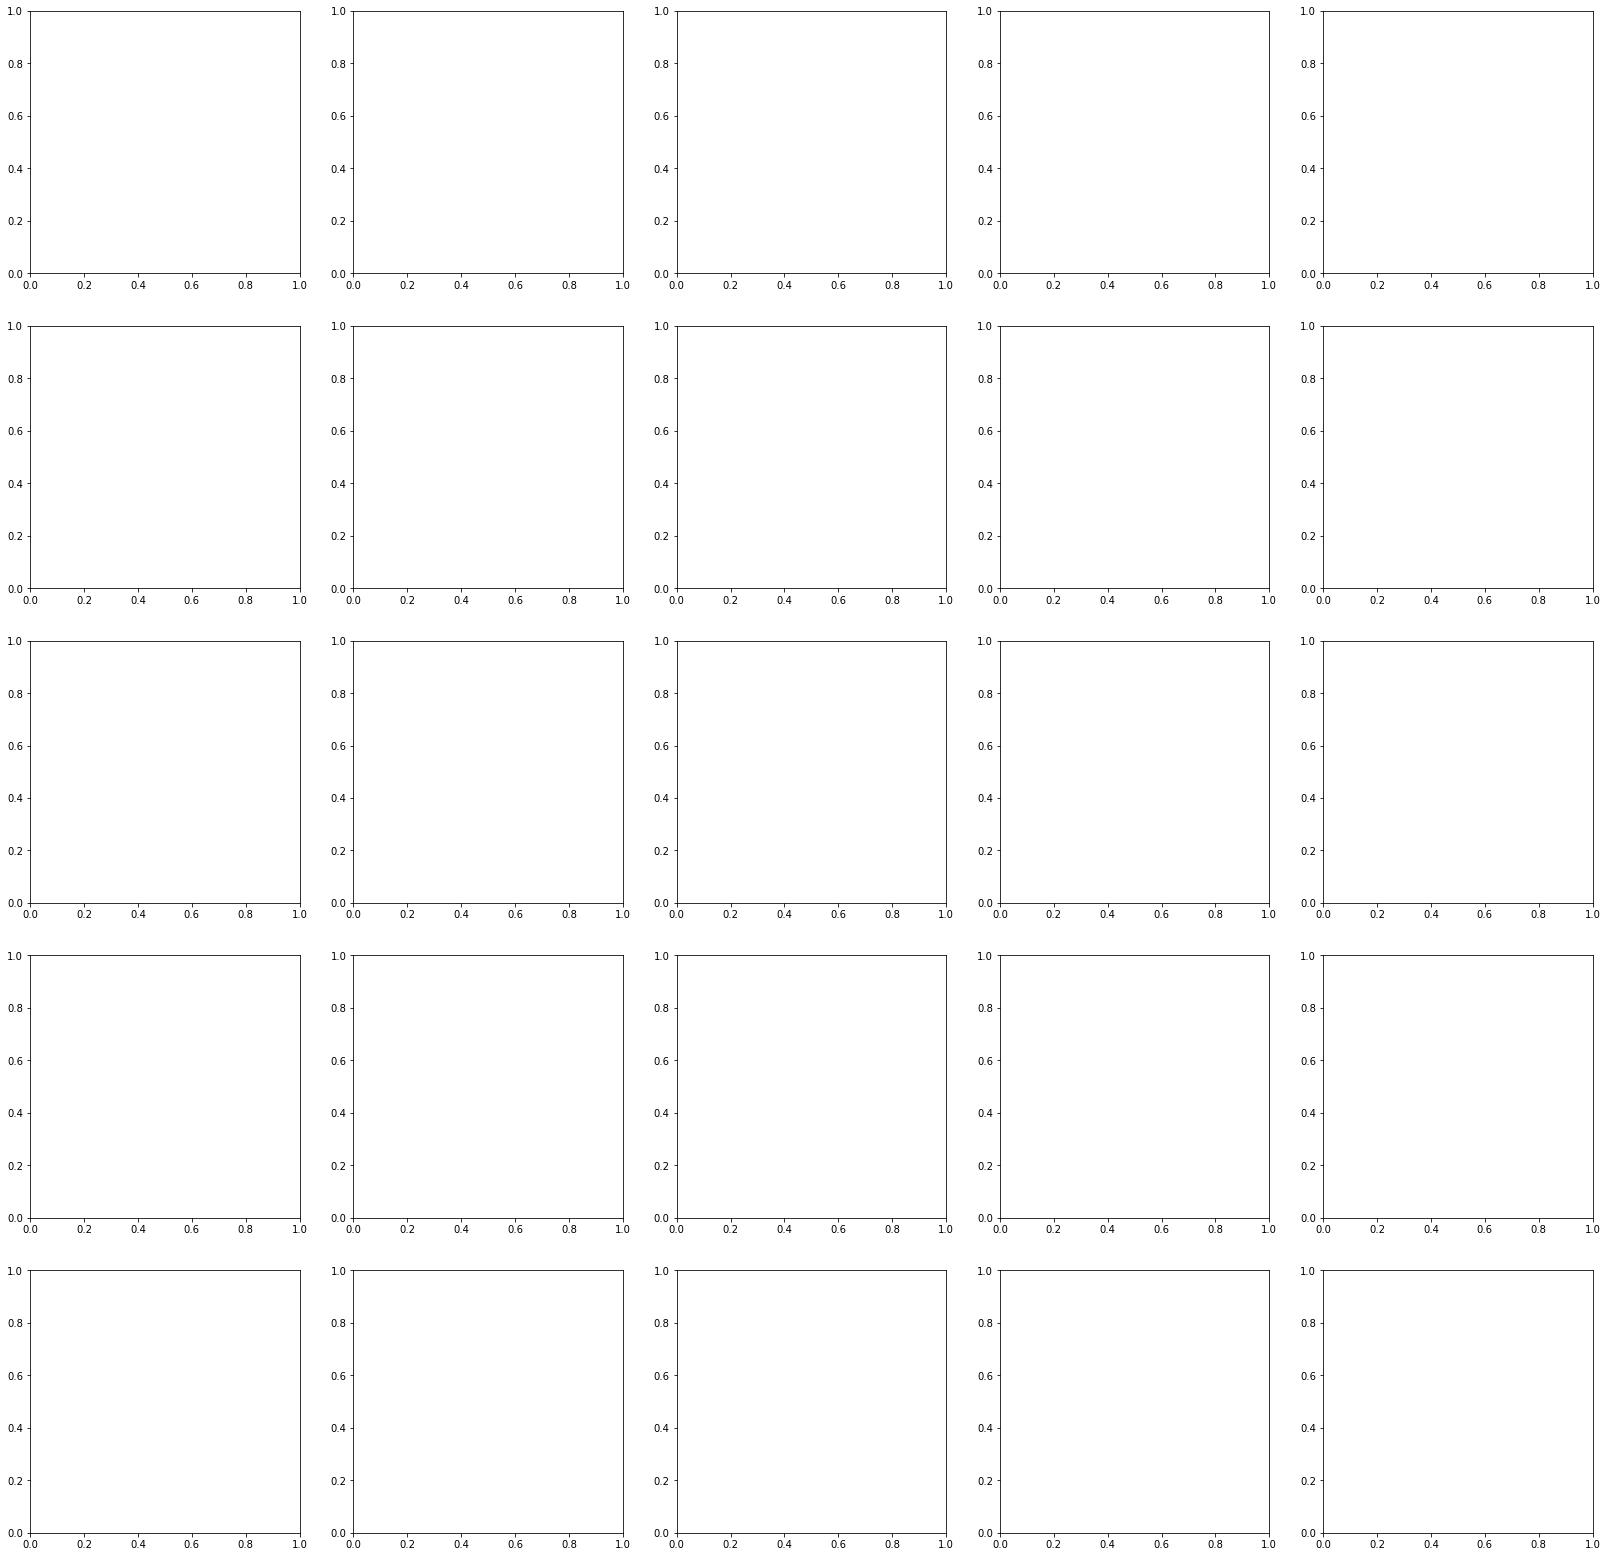

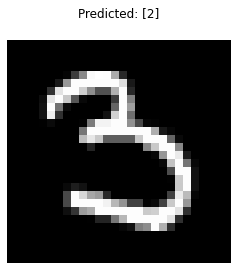

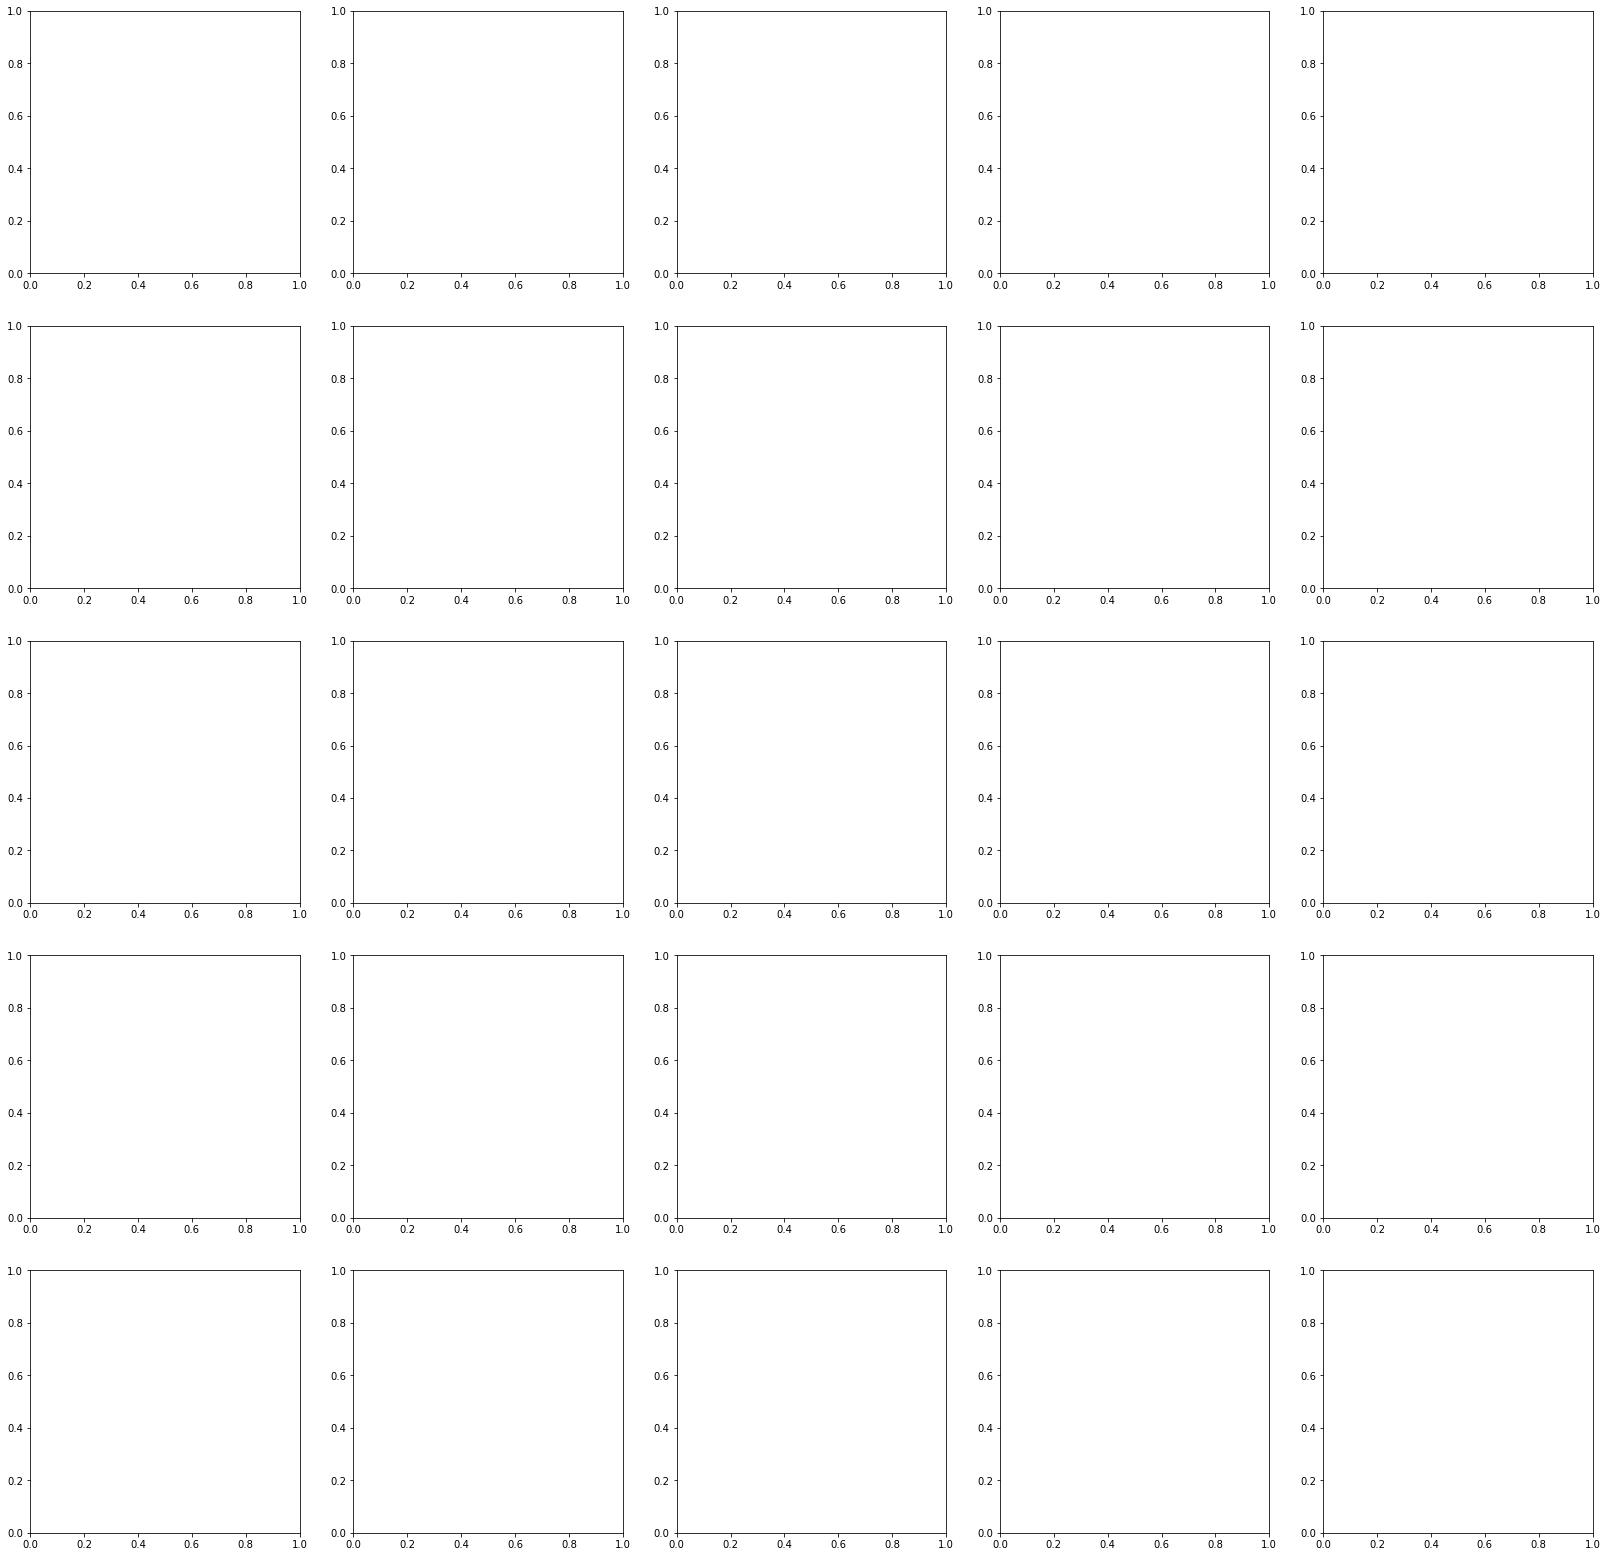

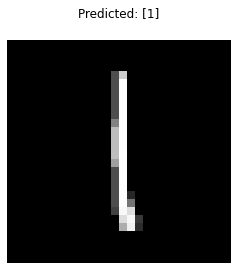

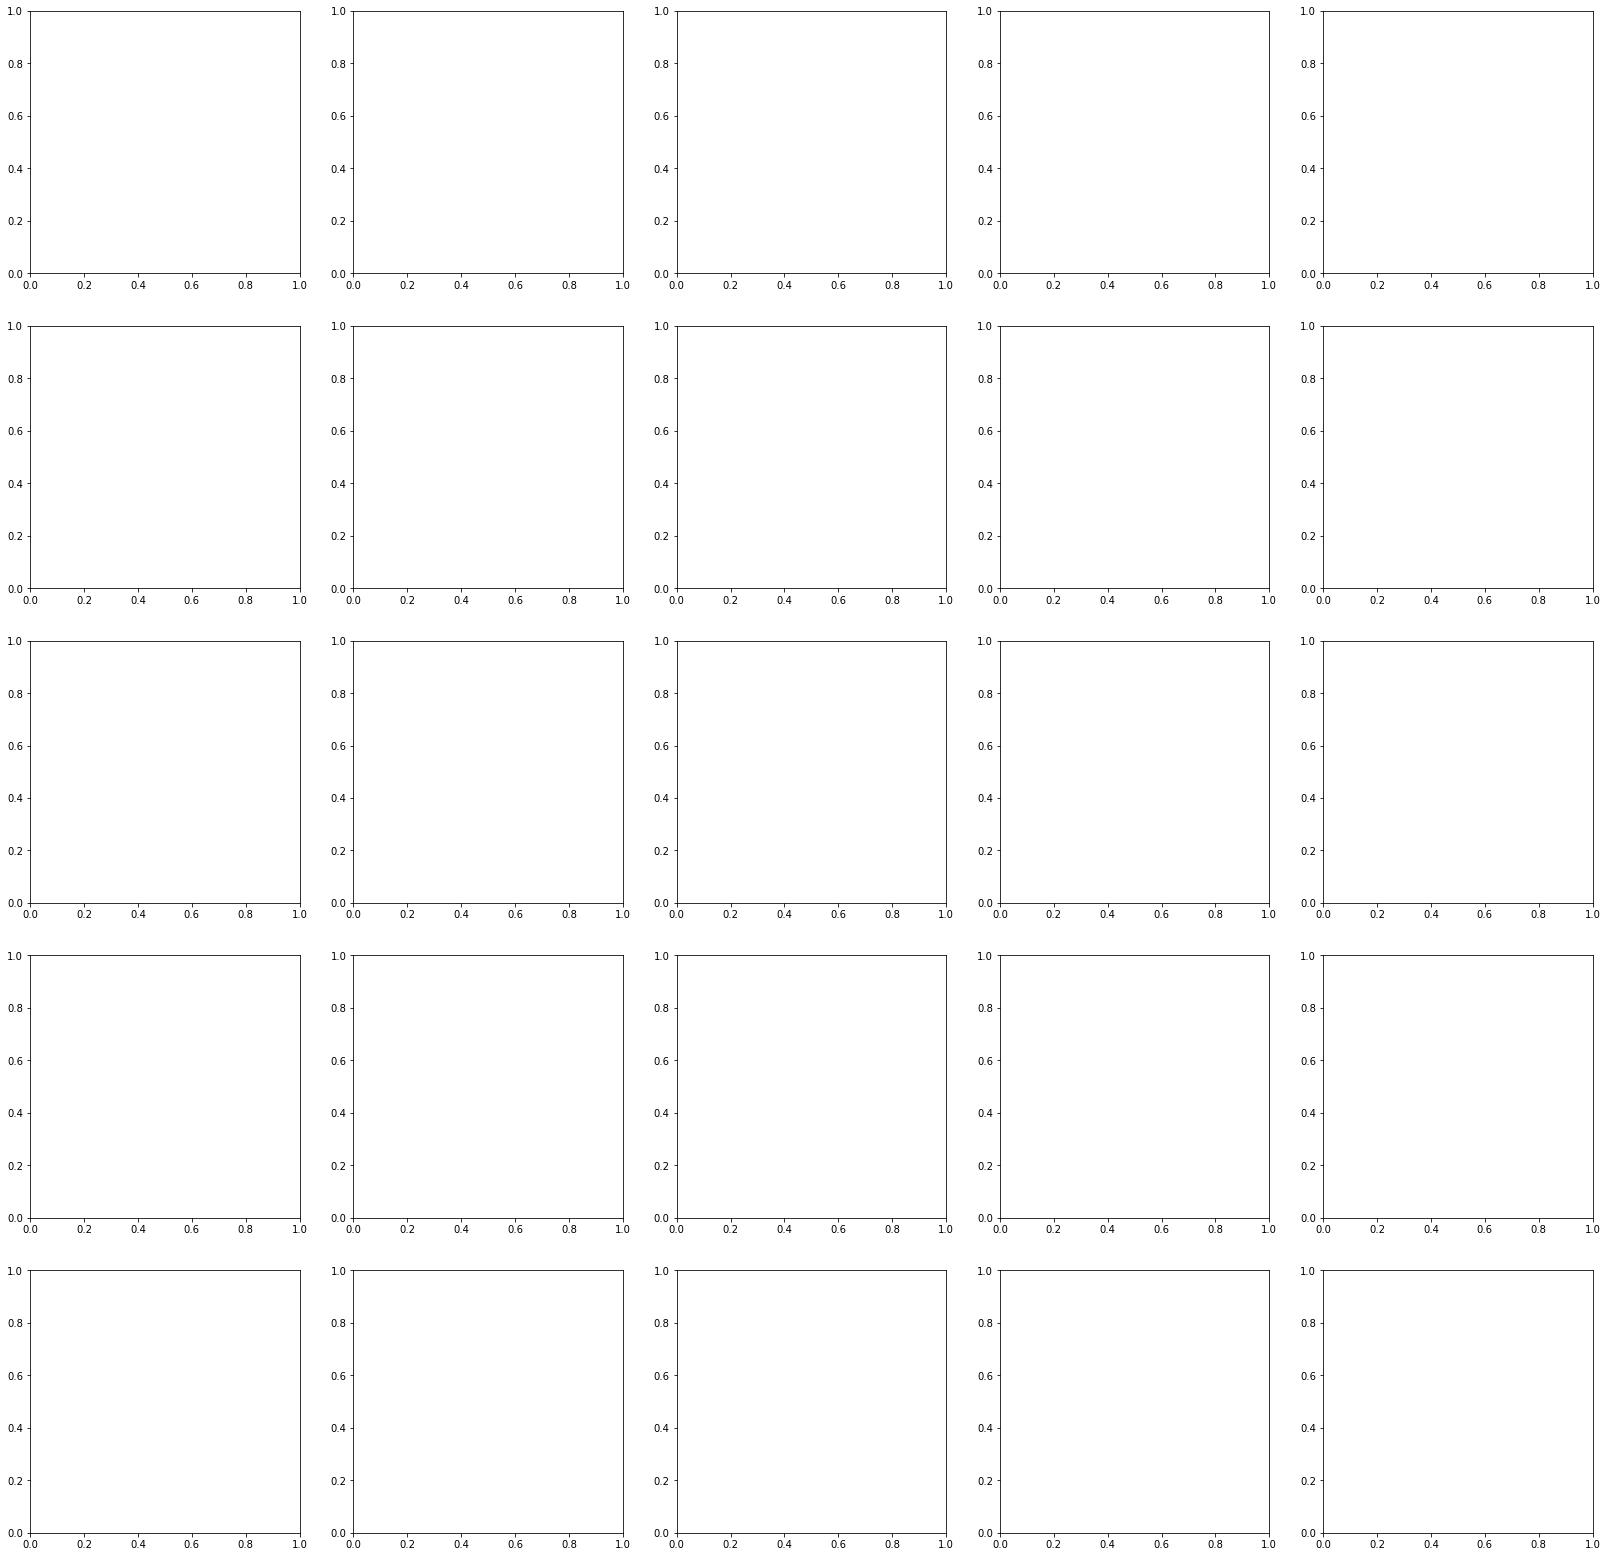

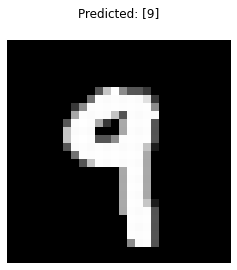

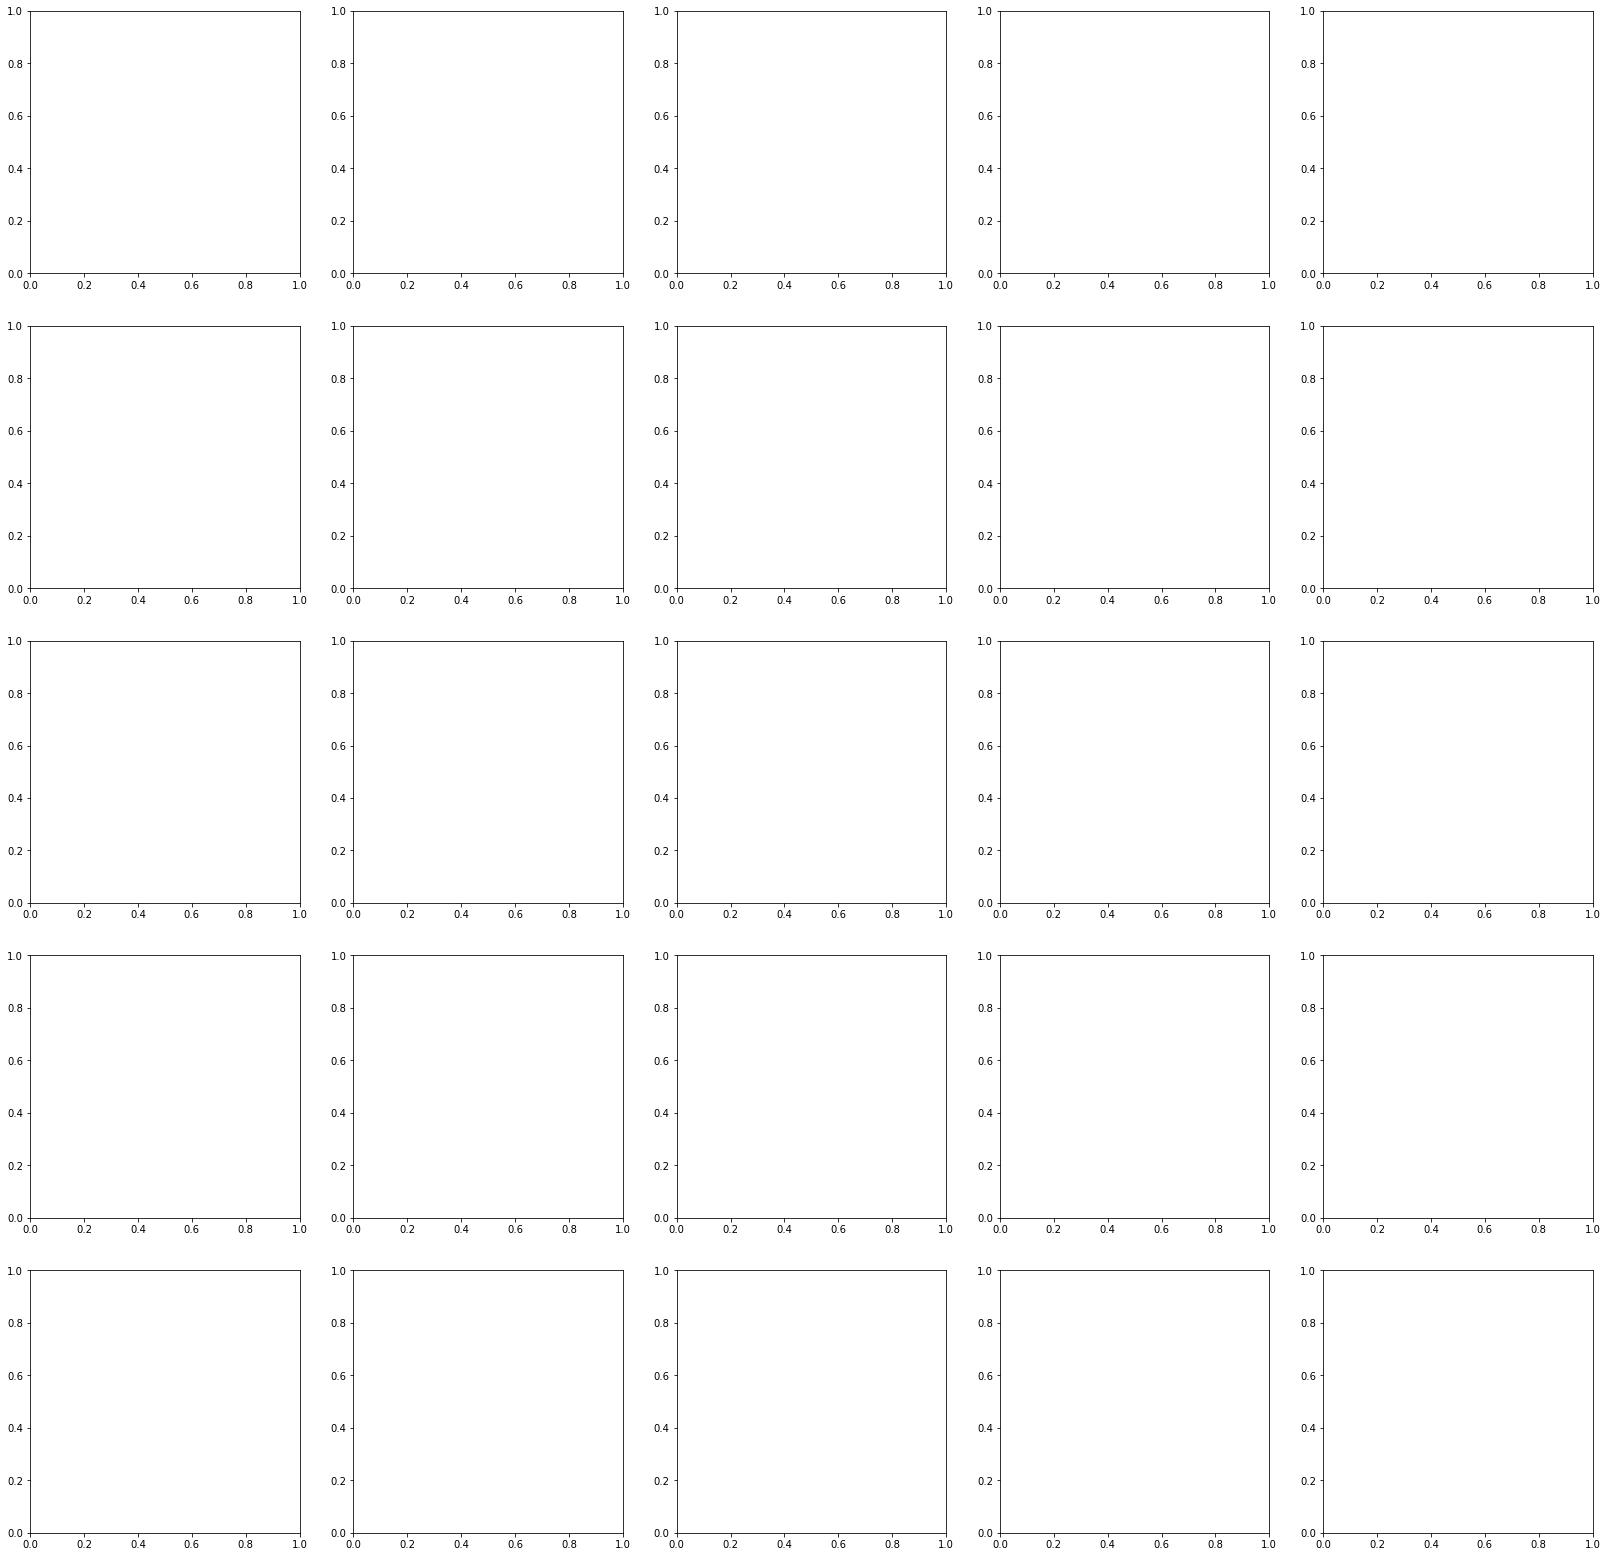

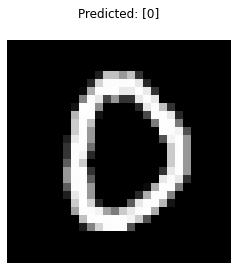

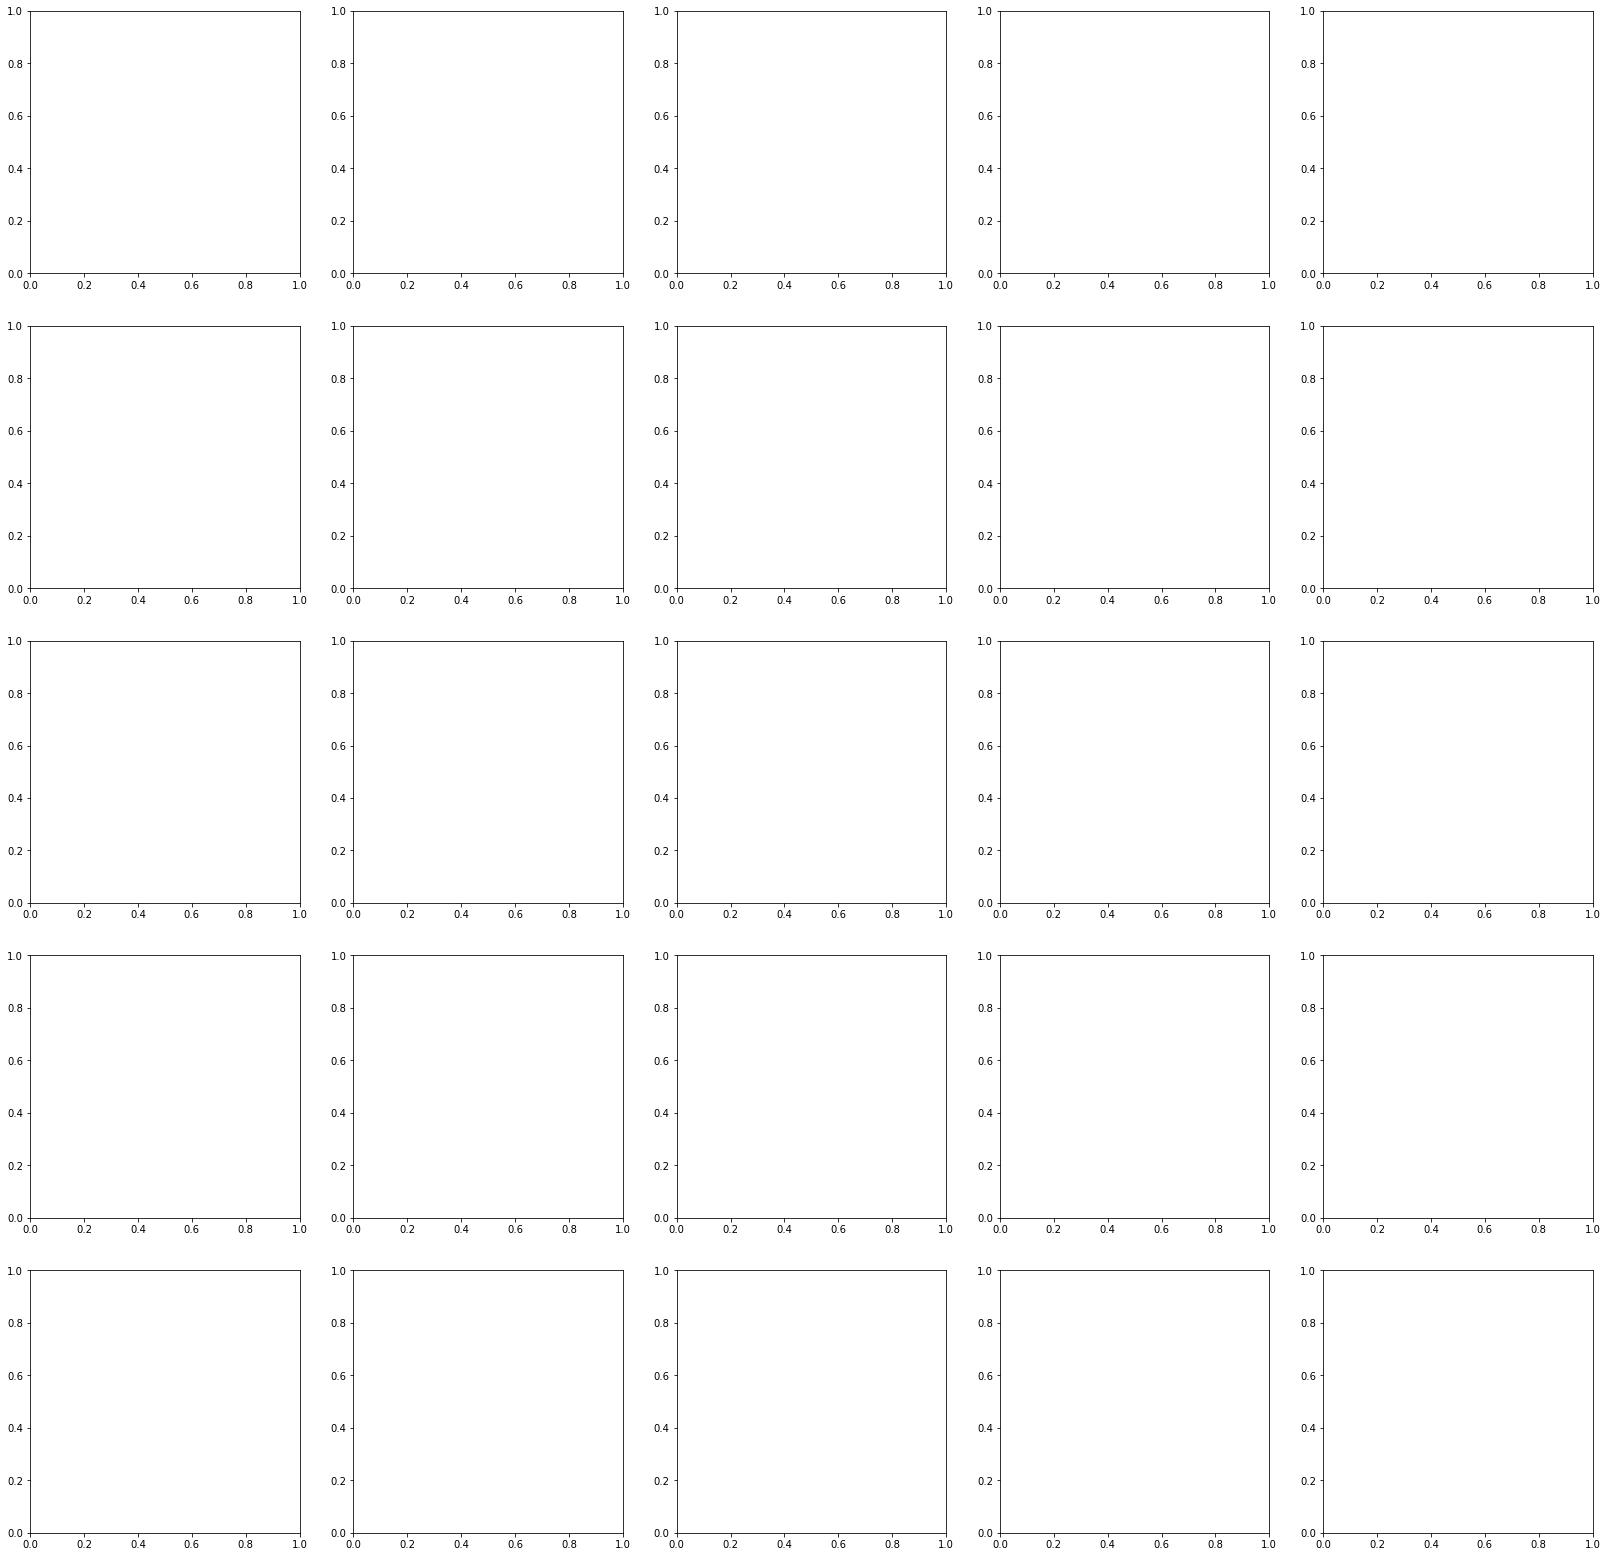

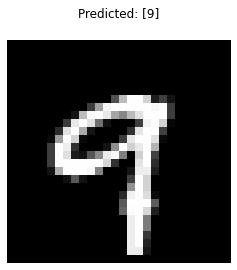

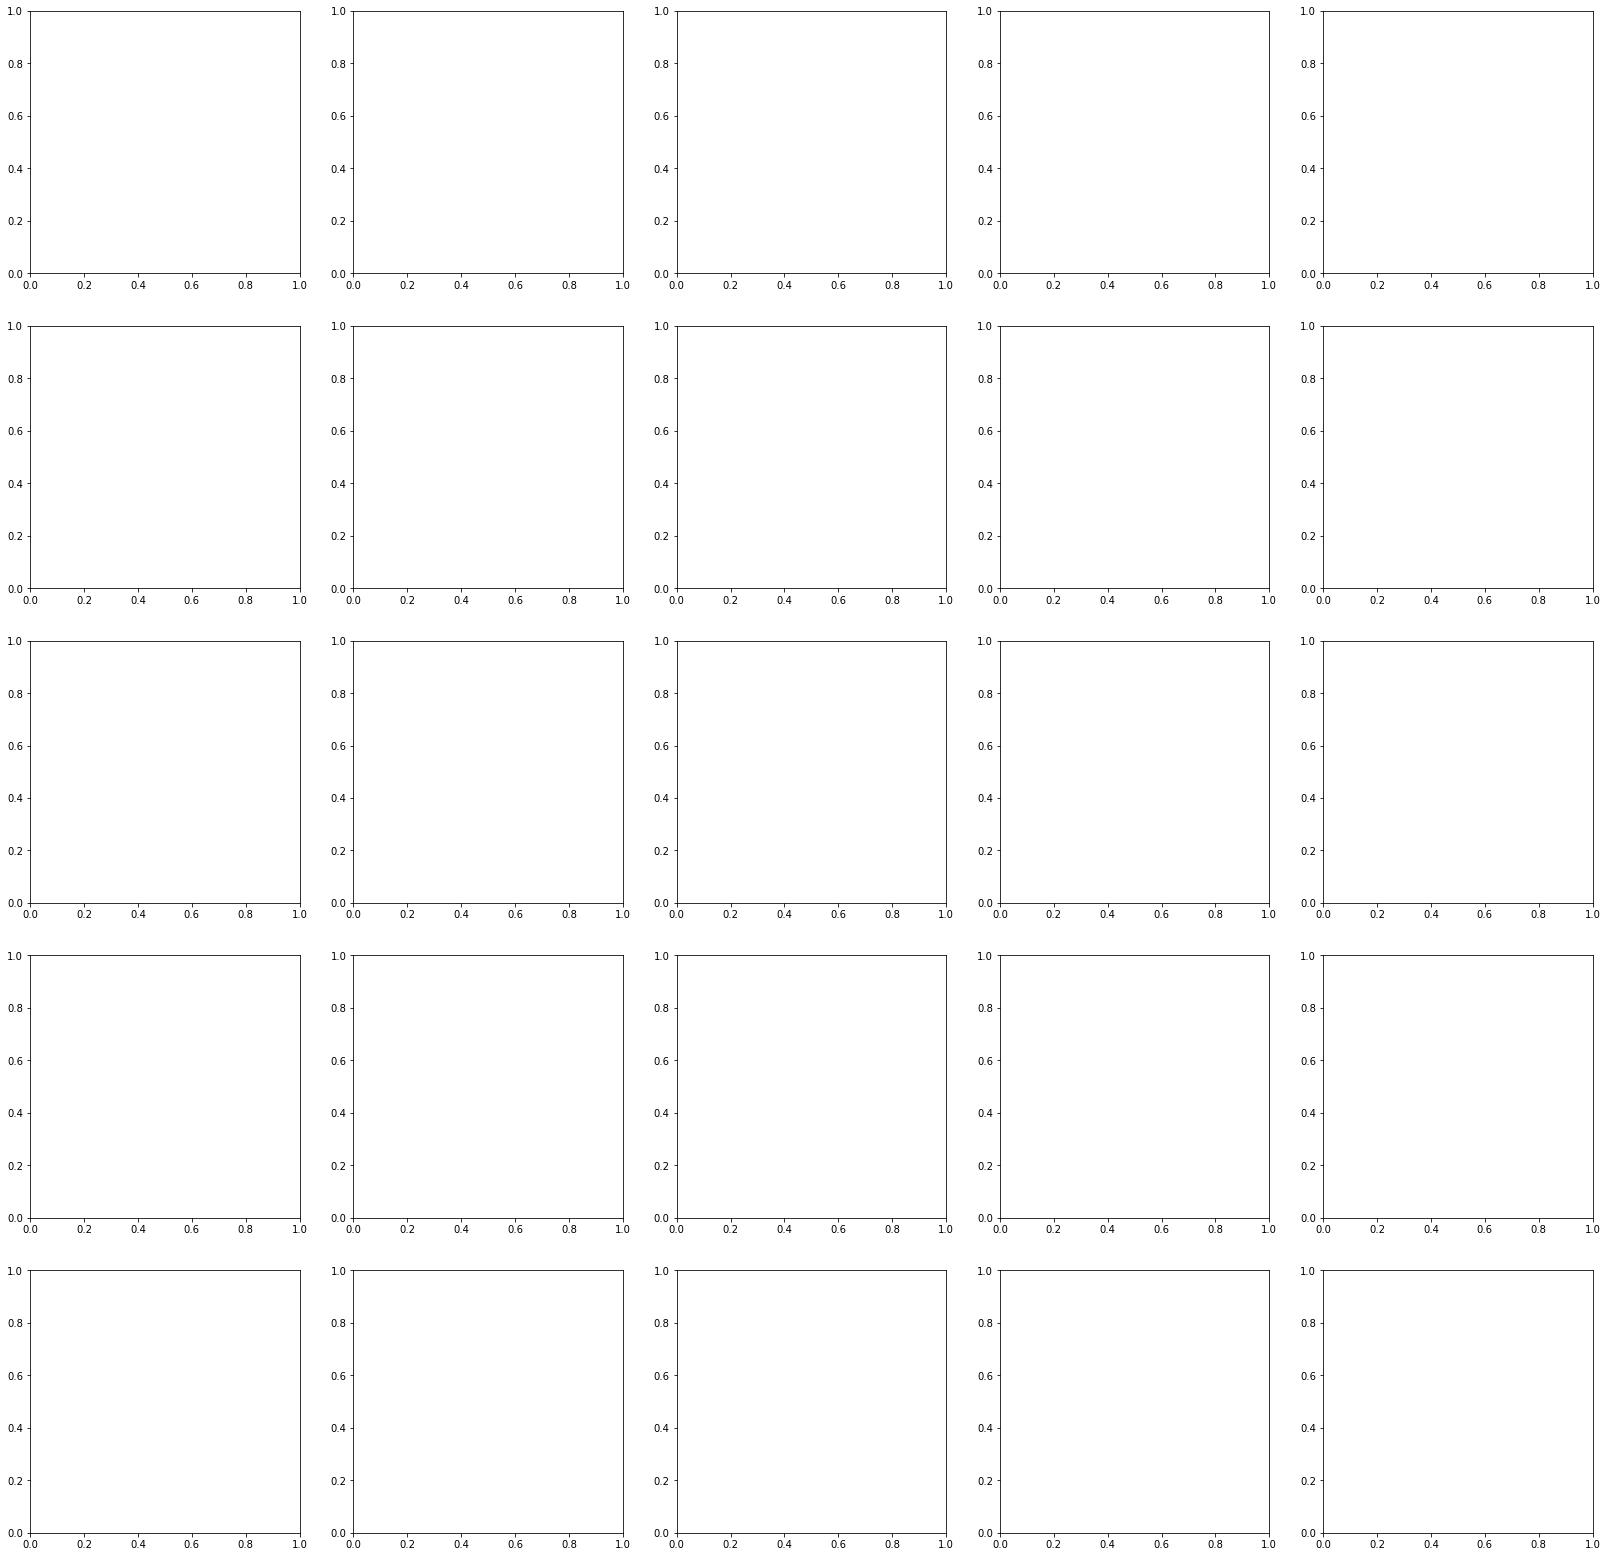

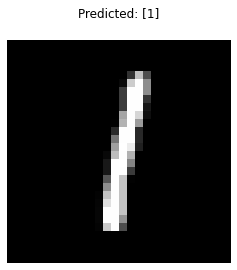

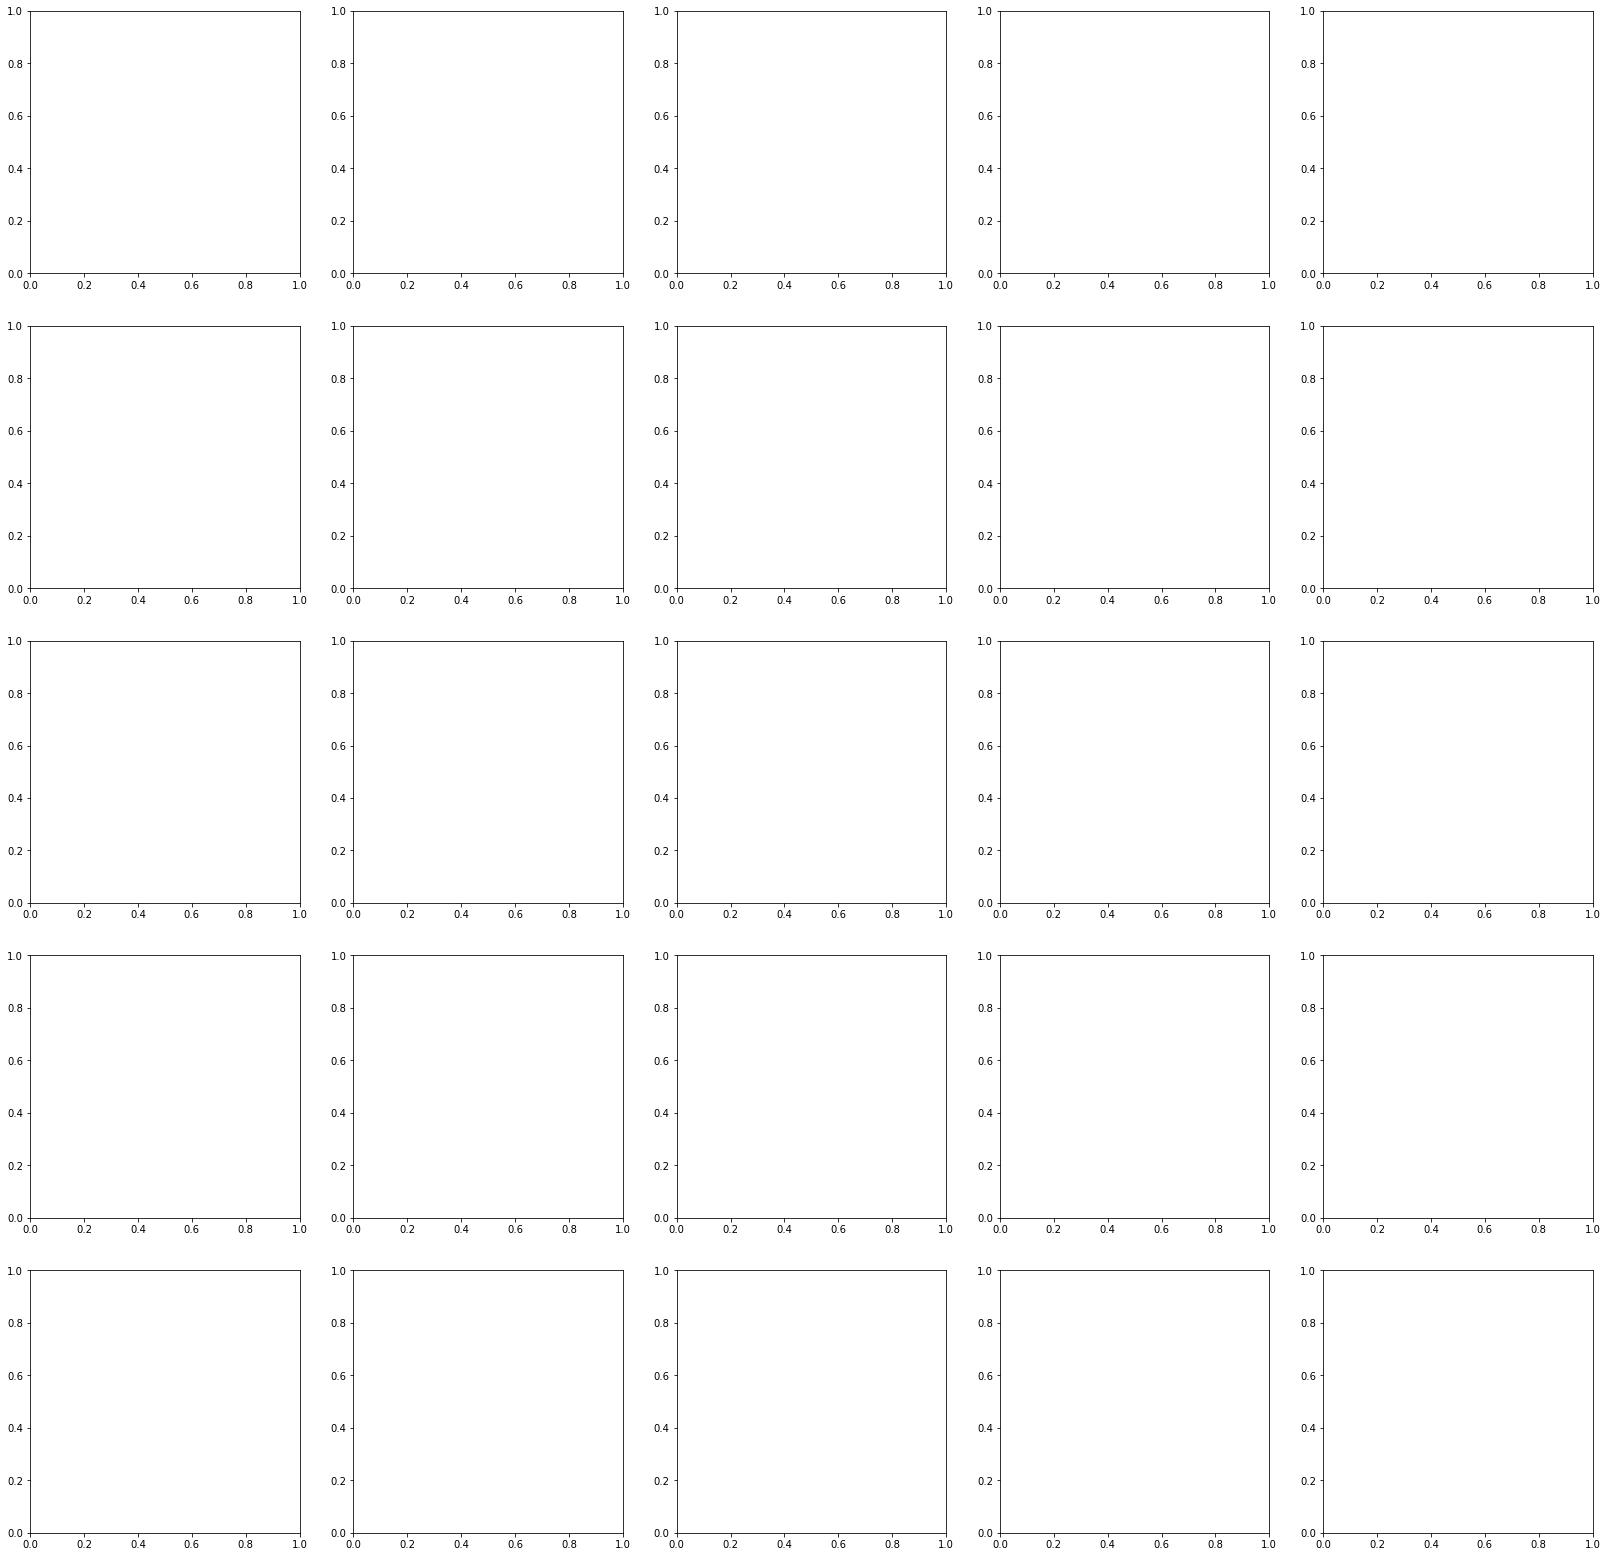

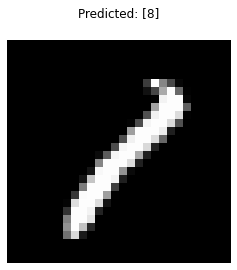

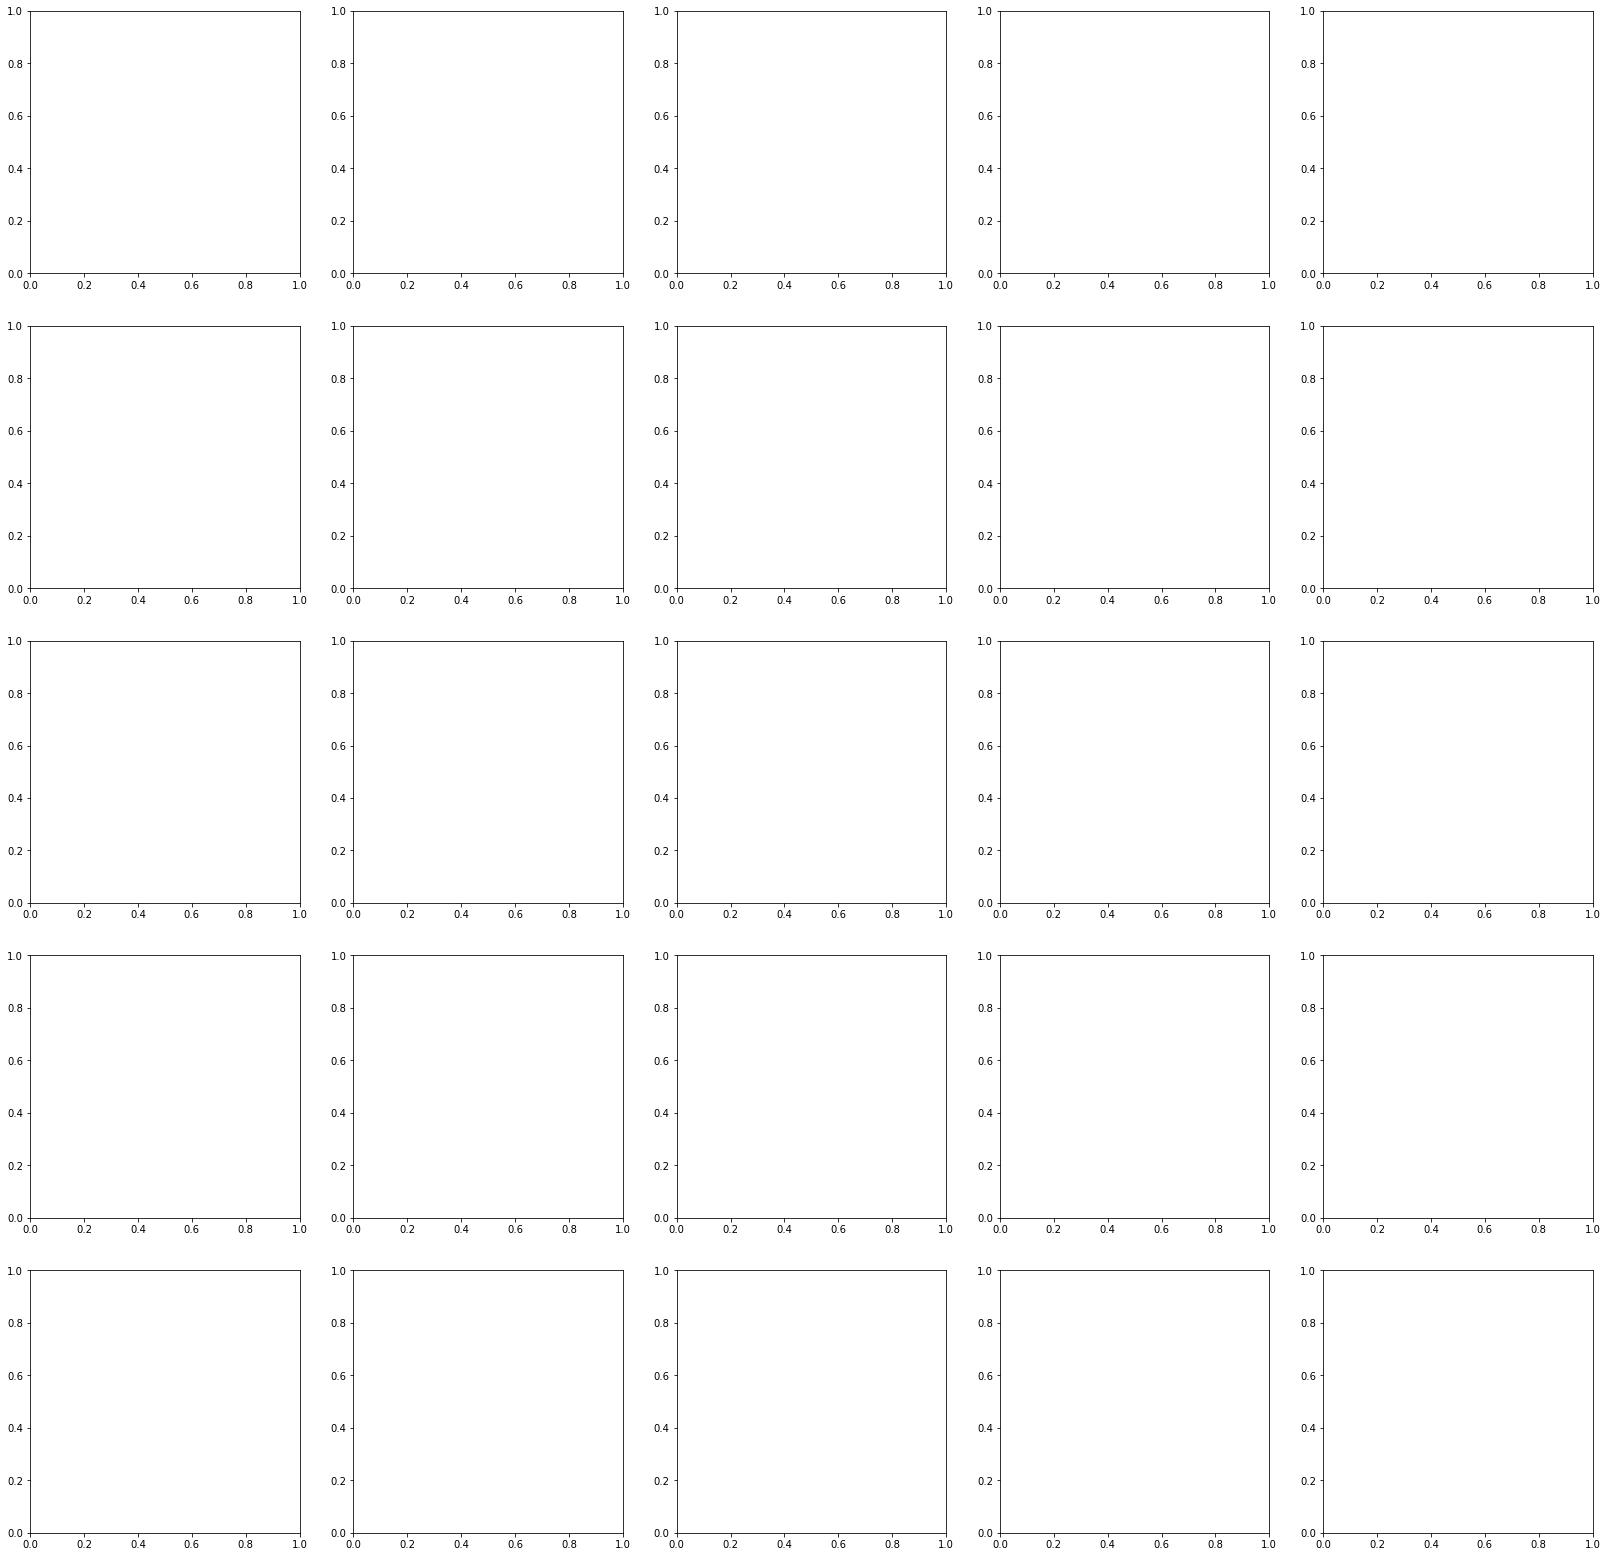

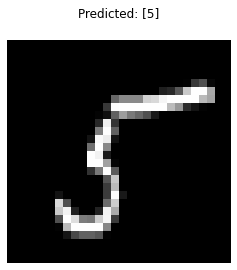

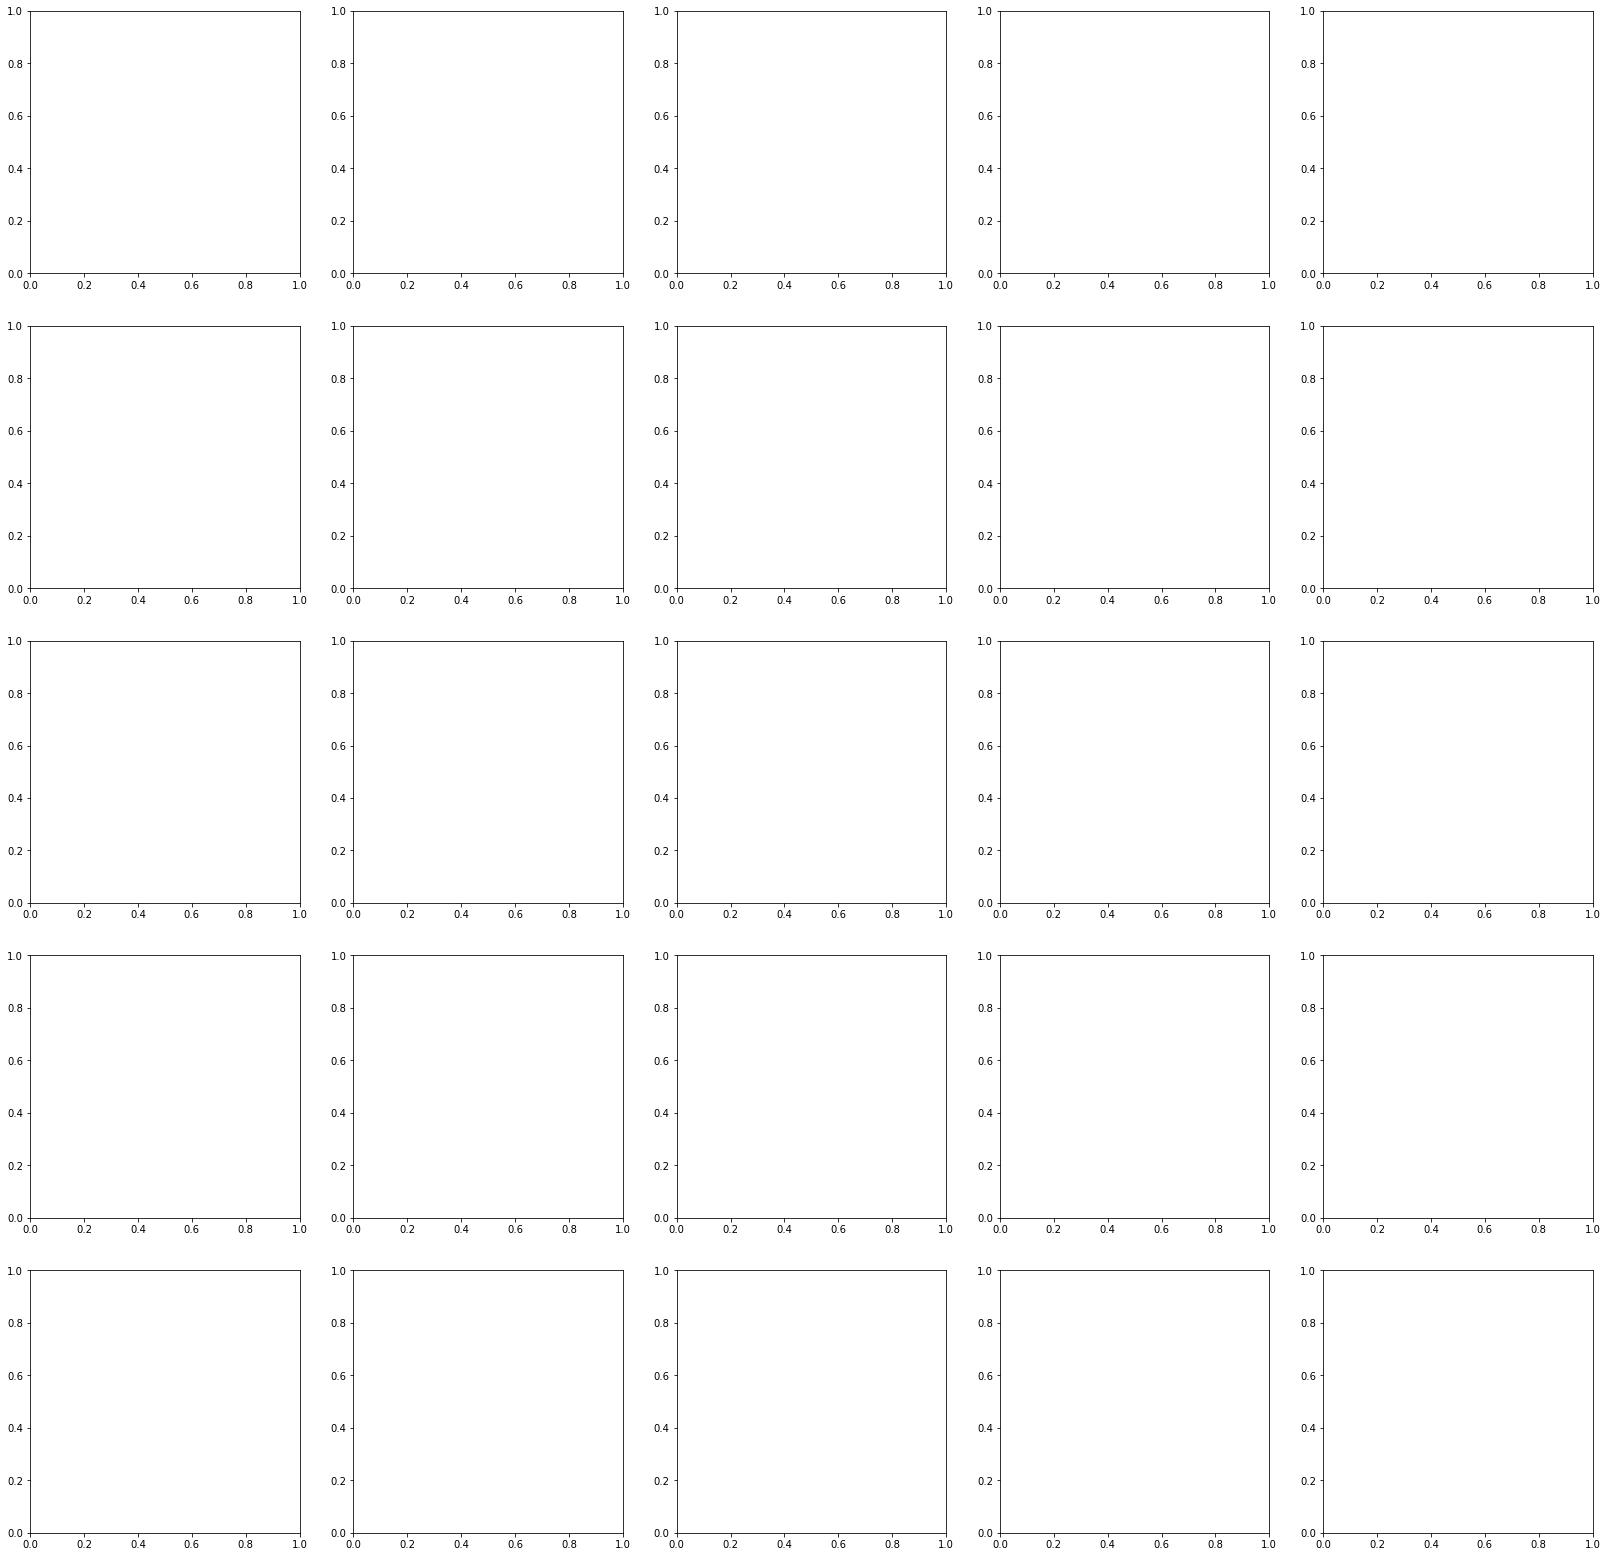

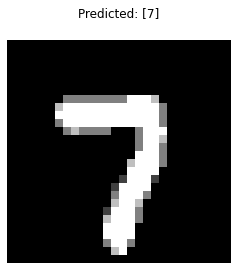

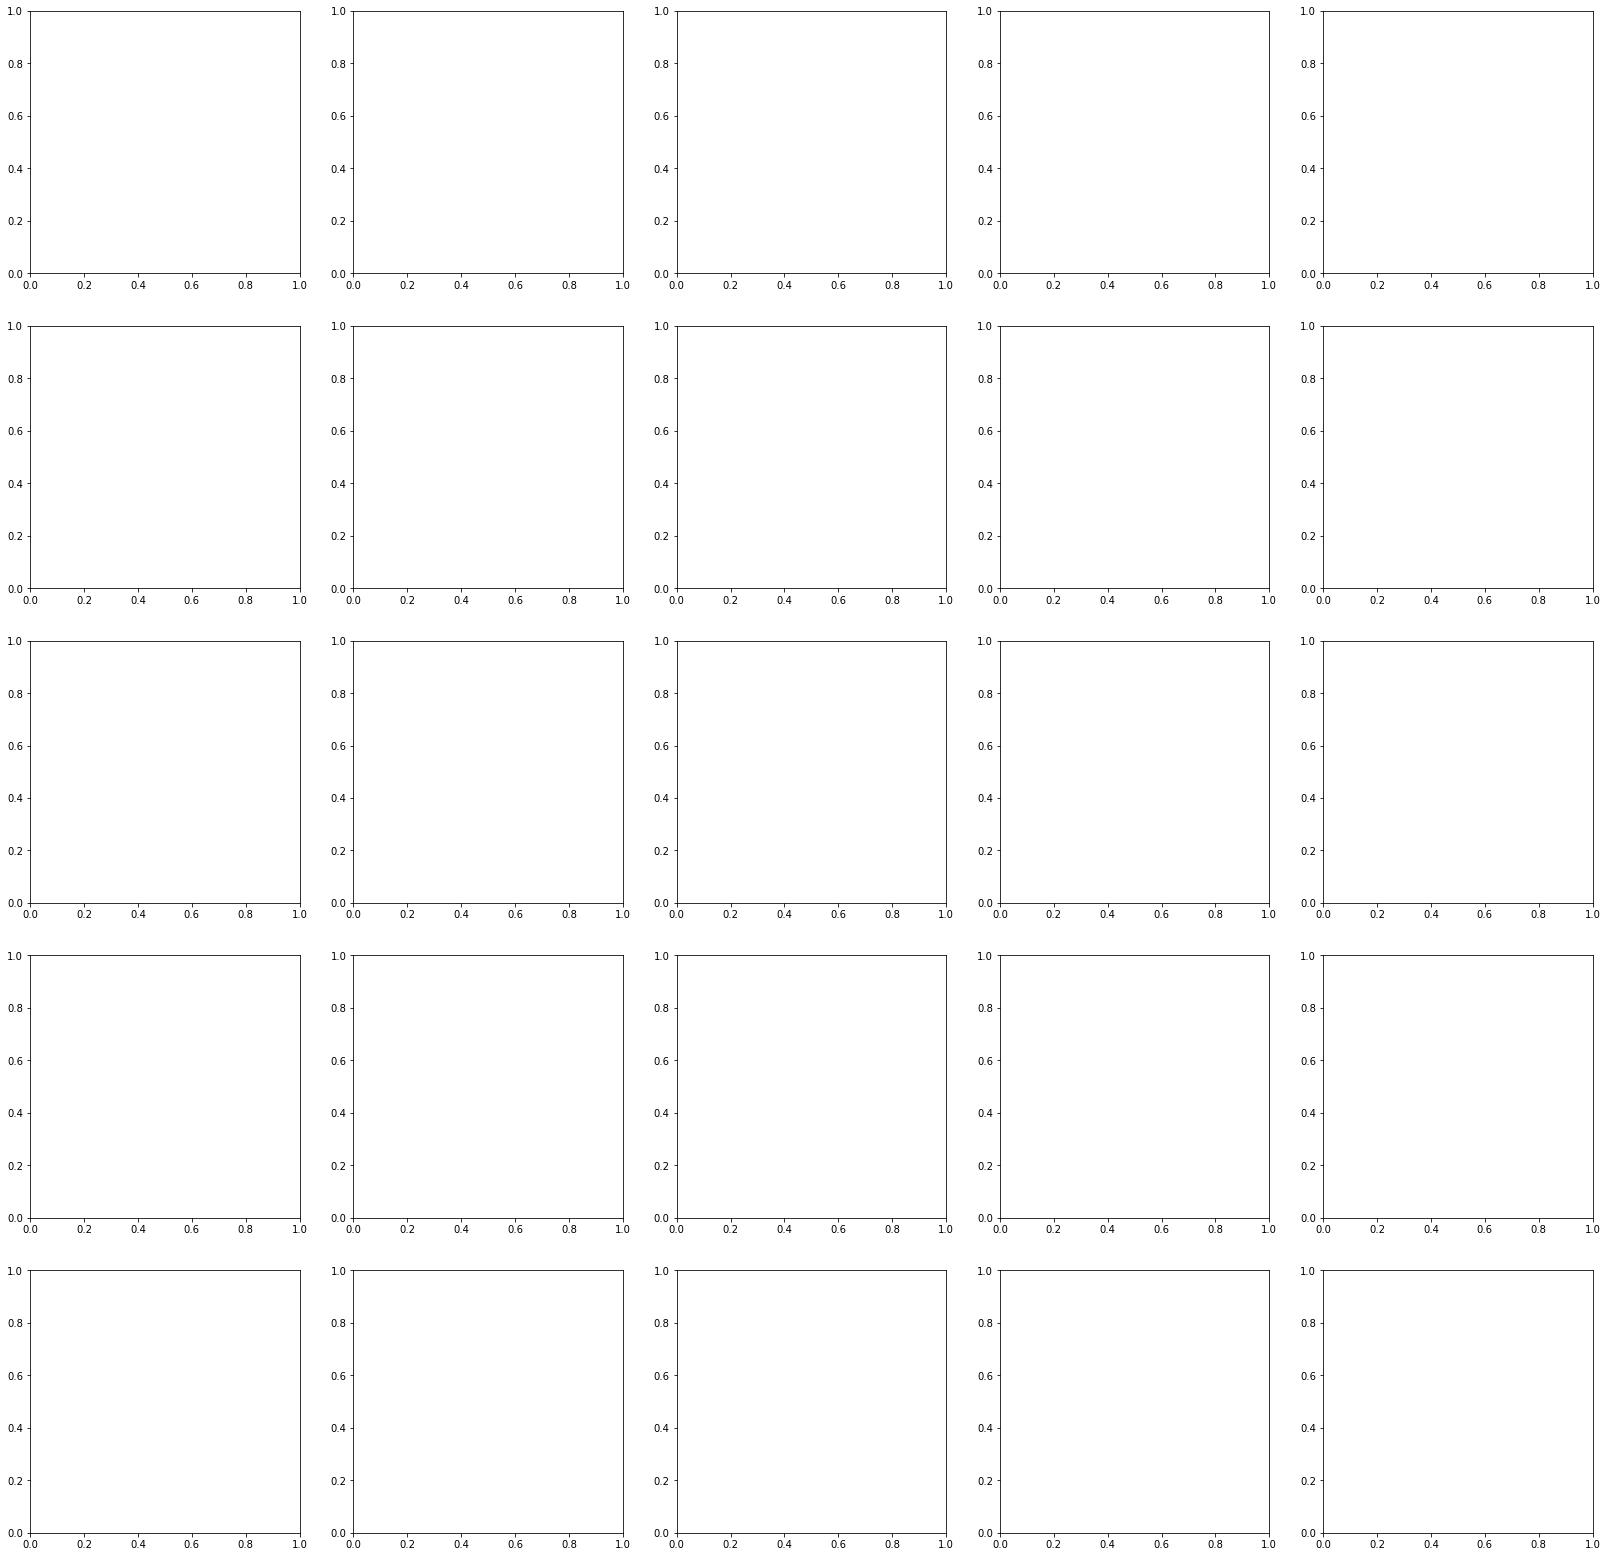

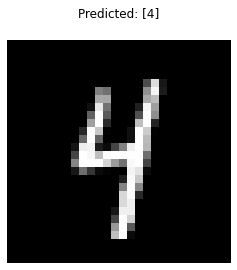

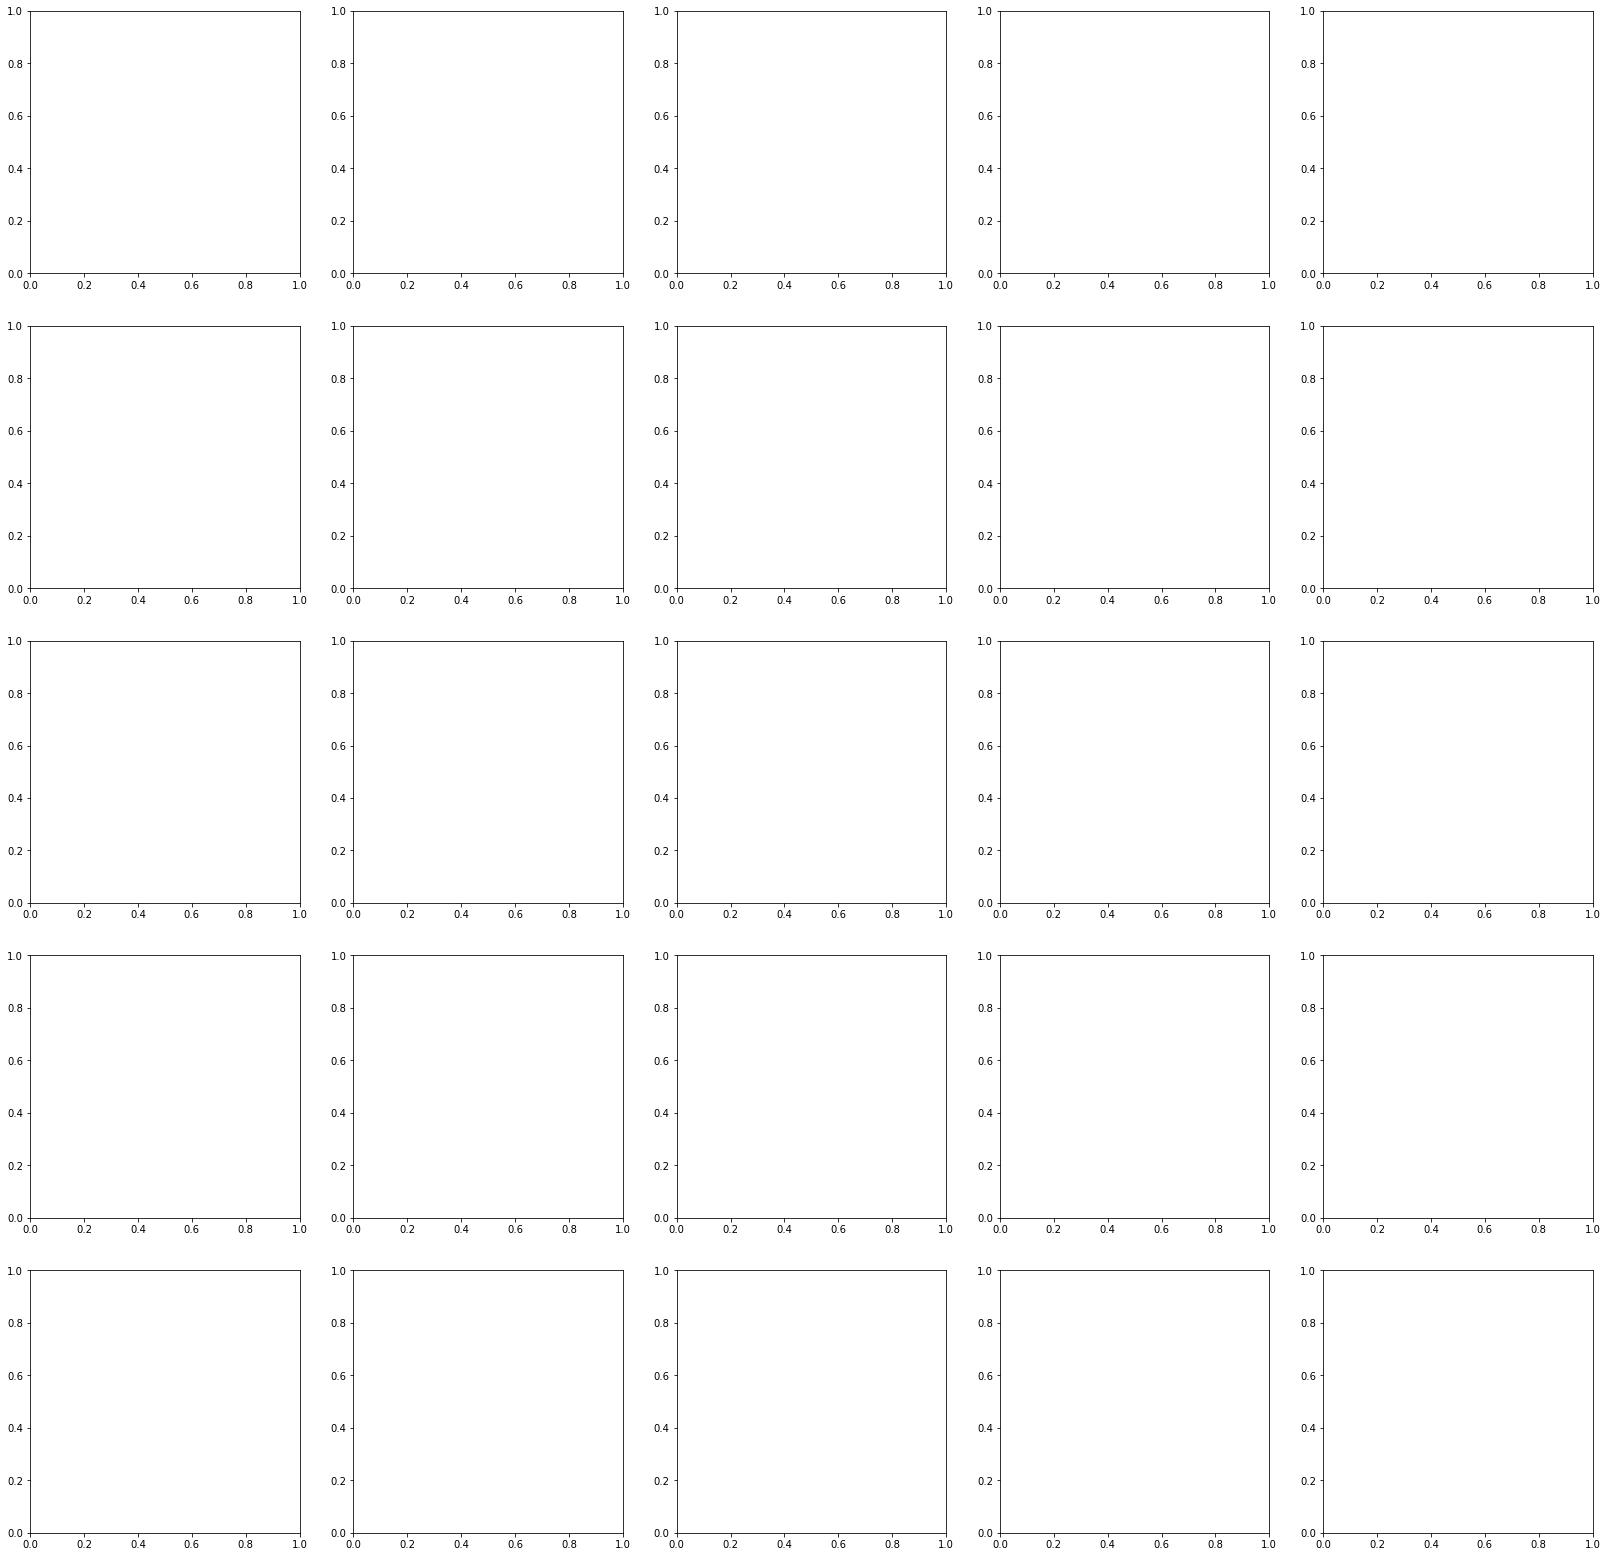

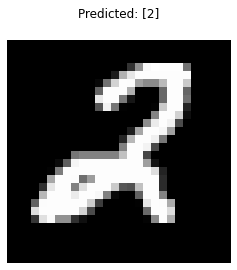

In [106]:
for i in range(2, 27):
    plt.subplots(5, 5, figsize=(28, 28))
    testPredictSHITTYMODEL(i)

## good model prediction (full dataset)

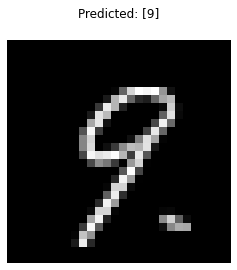

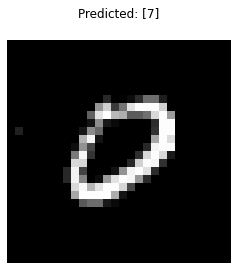

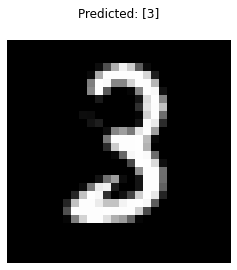

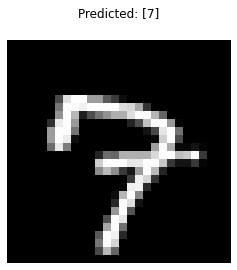

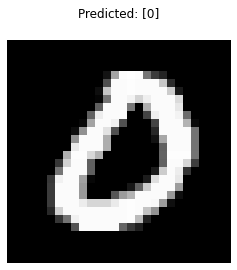

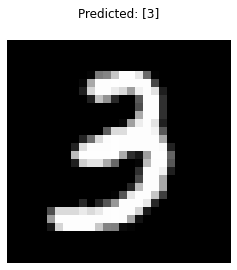

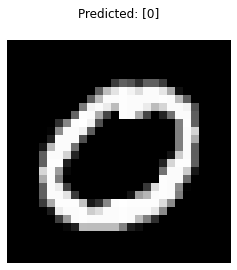

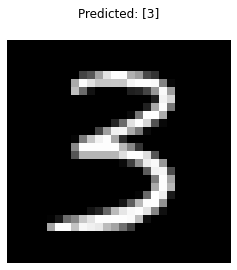

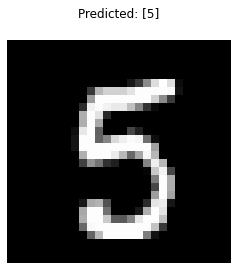

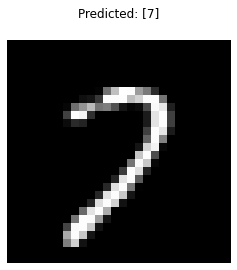

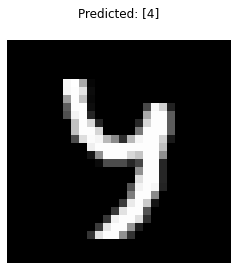

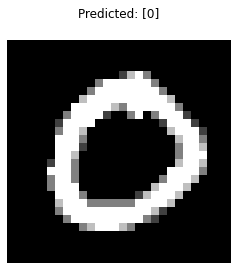

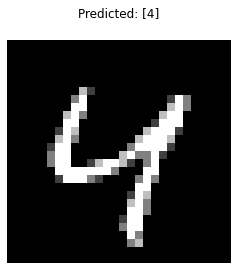

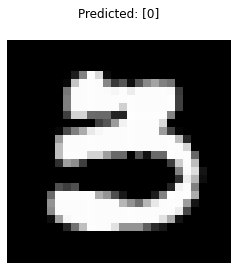

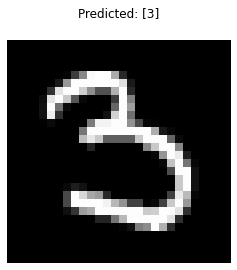

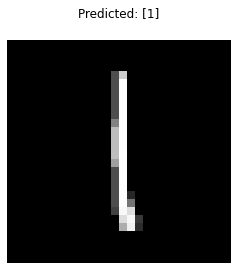

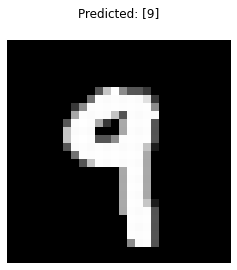

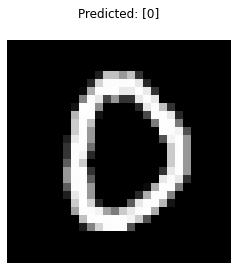

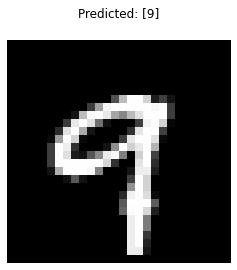

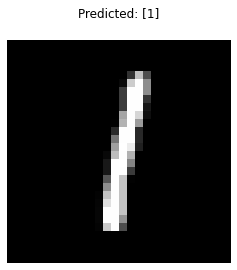

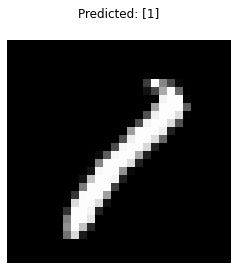

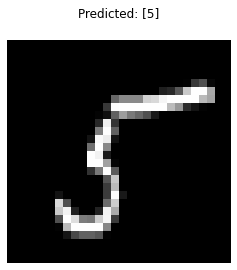

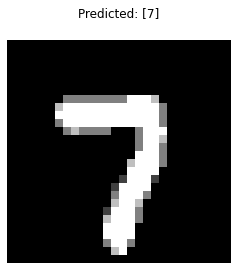

In [98]:
for i in range(2, 25):
    testPredict(i)